In [13]:
import pandas as pd

In [14]:
df=pd.read_csv("mo_hmo2.csv")

In [15]:
sliced_df = df[(df['Date'] >= '2005-01-01') & (df['Date'] <= '2005-02-15')]


In [18]:
sliced_df.to_csv("sliced.csv",index=False)

In [7]:
new_df= sliced_df.copy()

In [4]:
new_df

NameError: name 'new_df' is not defined

In [10]:
import pandas as pd
from collections import deque

from math import floor 

capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

# Finding the main trade
signal_idx = sliced_df[sliced_df['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * sliced_df.loc[signal_idx, 'Close'])

main_trade = {
    'start_idx': signal_idx,
    'active_lots': initial_lots,
    'trade_id': 1,
    'parent_id': None  # since it's the main trade
}

trade_queue = deque([main_trade])
trade_id_counter = 2
all_trades = []

while trade_queue:
    current_trade = trade_queue.popleft()
    start_idx = current_trade['start_idx']
    trade_slice = sliced_df.loc[start_idx:].copy()

    signal_day_close = trade_slice.iloc[0]['Close']
    current_highest_close = signal_day_close

    for i, row in trade_slice.iterrows():
        if row['Close'] > current_highest_close:
            # Spawn a new trade
            liquidated_lots = floor(0.1 * current_trade['active_lots'])  # This is an example, modify as needed
            current_trade['active_lots'] -= liquidated_lots

            spawned_trade = {
                'start_idx': i,
                'active_lots': liquidated_lots + 1,
                'trade_id': trade_id_counter,
                'parent_id': current_trade['trade_id']
            }
            trade_queue.append(spawned_trade)
            trade_id_counter += 1

            current_highest_close = row['Close']

        if row['Close'] < signal_day_close * 0.9:
            # Terminate the trade
            break

    all_trades.append(current_trade)

# Now, `all_trades` contains details of all trades. 
# Convert this to a DataFrame for easier viewing and saving.
trade_df = pd.DataFrame(all_trades)
trade_df.to_csv('all_trades.csv', index=False)


In [11]:
trade_df

,start_idx,active_lots,trade_id,parent_id
0,1267,9.0,1,NaN
1,1268,2.0,2,1.0
2,1269,1.0,3,1.0
3,1270,1.0,4,1.0
4,1272,1.0,5,1.0
...,...,...,...,...
59,1279,1.0,60,44.0
60,1279,1.0,61,46.0
61,1279,1.0,62,49.0
62,1279,1.0,63,53.0


In [12]:
import pandas as pd
from collections import deque
from math import floor

capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

# Finding the main trade
signal_idx = sliced_df[sliced_df['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * sliced_df.loc[signal_idx, 'Close'])

main_trade = {
    'open_date': sliced_df.loc[signal_idx, 'Date'],
    'active_lots': initial_lots,
    'trade_id': 1,
    'parent_id': None  # since it's the main trade
}

trade_queue = deque([main_trade])
trade_id_counter = 2
all_trades = []

while trade_queue:
    current_trade = trade_queue.popleft()
    start_date = current_trade['open_date']
    trade_slice = sliced_df[sliced_df['Date'] >= start_date].copy()

    signal_day_close = trade_slice.iloc[0]['Close']
    current_highest_close = signal_day_close
    trade_data = []

    for i, row in trade_slice.iterrows():
        daily_data = {
            'Date': row['Date'],
            'open_date': current_trade['open_date'],
            'trade_id': current_trade['trade_id'],
            'parent_id': current_trade['parent_id'],
            'active_lots': current_trade['active_lots']
        }
        
        if row['Close'] > current_highest_close:
            # Spawn a new trade
            liquidated_lots = floor(0.1 * current_trade['active_lots'])
            current_trade['active_lots'] -= liquidated_lots

            spawned_trade = {
                'open_date': row['Date'],
                'active_lots': liquidated_lots + 1,
                'trade_id': trade_id_counter,
                'parent_id': current_trade['trade_id']
            }
            trade_queue.append(spawned_trade)
            trade_id_counter += 1

            current_highest_close = row['Close']

        if row['Close'] < signal_day_close * 0.9:
            # Terminate the trade
            break

        trade_data.append(daily_data)
    
    all_trades.extend(trade_data)

# Convert `all_trades` into a DataFrame for easier viewing and saving
trade_df = pd.DataFrame(all_trades)
trade_df.to_csv('all_trades.csv', index=False)


In [13]:
trade_df

,Date,open_date,trade_id,parent_id,active_lots
0,2005-01-27,2005-01-27,1,NaN,10.0
1,2005-01-28,2005-01-27,1,NaN,10.0
2,2005-01-31,2005-01-27,1,NaN,9.0
3,2005-02-01,2005-01-27,1,NaN,9.0
4,2005-02-02,2005-01-27,1,NaN,9.0
...,...,...,...,...,...
274,2005-02-15,2005-02-14,62,49.0,1.0
275,2005-02-14,2005-02-14,63,53.0,1.0
276,2005-02-15,2005-02-14,63,53.0,1.0
277,2005-02-14,2005-02-14,64,58.0,1.0


In [18]:
import pandas as pd
from collections import deque
from math import floor

capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

# Finding the main trade
signal_idx = sliced_df[sliced_df['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * sliced_df.loc[signal_idx, 'Close'])

main_trade = {
    'open_date': sliced_df.loc[signal_idx, 'Date'],
    'active_lots': initial_lots,
    'trade_id': 1,
    'parent_id': None  # since it's the main trade
}

trade_queue = deque([main_trade])
trade_id_counter = 2
all_trades = []

while trade_queue:
    current_trade = trade_queue.popleft()
    start_date = current_trade['open_date']
    trade_slice = sliced_df[sliced_df['Date'] >= start_date].copy()

    signal_day_close = trade_slice.iloc[0]['Close']
    current_highest_close = signal_day_close
    trade_data = []

    for i, row in trade_slice.iterrows():
        daily_data = {
            'Date': row['Date'],
            'open_date': current_trade['open_date'],
            'trade_id': current_trade['trade_id'],
            'parent_id': current_trade['parent_id'],
            'active_lots': current_trade['active_lots']
        }
        
        if row['Close'] > current_highest_close:
            # Spawn a new trade
            liquidated_lots = floor(0.1 * current_trade['active_lots'])
            current_trade['active_lots'] -= liquidated_lots

            spawned_trade = {
                'open_date': row['Date'],
                'active_lots': liquidated_lots + 1,
                'trade_id': trade_id_counter,
                'parent_id': current_trade['trade_id']
            }
            trade_queue.append(spawned_trade)
            trade_id_counter += 1

            current_highest_close = row['Close']

        # Add current day's data even if the trade is going to be terminated
        trade_data.append(daily_data)

        if row['Close'] < signal_day_close * 0.9:
            # Terminate the trade
            break
    
    all_trades.extend(trade_data)

# Convert `all_trades` into a DataFrame for easier viewing and saving
trade_df = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date', 'trade_id']).reset_index(drop=True)
#trade_df.to_csv('all_trades.csv', index=False)


In [19]:
trade_df

,Date,open_date,trade_id,parent_id,active_lots
0,2005-01-27,2005-01-27,1,NaN,10.0
1,2005-01-28,2005-01-27,1,NaN,10.0
2,2005-01-28,2005-01-28,2,1.0,2.0
3,2005-01-31,2005-01-27,1,NaN,9.0
4,2005-01-31,2005-01-28,2,1.0,2.0
...,...,...,...,...,...
274,2005-02-15,2005-02-14,60,44.0,1.0
275,2005-02-15,2005-02-14,61,46.0,1.0
276,2005-02-15,2005-02-14,62,49.0,1.0
277,2005-02-15,2005-02-14,63,53.0,1.0


In [ ]:
we need atleast 1 liquidated lot to initiate a spawned trade even if there is a higher high.

In [8]:
import pandas as pd
from math import floor

# Initialization
capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

# Identify the main trade signal index
signal_idx = new_df[(new_df['Date'] >= '2005-01-01') & (new_df['signals'] == 'HMO')].index[0]
initial_lots = floor((capital * max_exposure) / (75 * new_df.loc[signal_idx, 'Close']))

main_trade = {
    'start_idx': signal_idx,
    'initial_lots': initial_lots,
    'active_lots': initial_lots,
    'trade_id': 1,
    'parent_id': None,
    'current_highest': new_df.loc[signal_idx, 'Close'],
    'signal_day_close': new_df.loc[signal_idx, 'Close'],
    'start_date': new_df.loc[signal_idx, 'Date']
}

def process_trade(trade, idx):
    today_data = new_df.iloc[idx]
    current_date = today_data['Date']
    closing_price = today_data['Close']
    
    if trade['active_lots'] == 0:  # If the trade is already terminated, do nothing
        return trade
    
    # Check for highest high update
    if closing_price > trade['current_highest']:
        trade['current_highest'] = closing_price

    # Check for spawning condition
    if closing_price > trade['current_highest']:
        # Calculate lots to be liquidated
        liquidated_lots = floor((0.10 * trade['active_lots']))
        trade['active_lots'] -= liquidated_lots

        # Spawn new trade
        spawned_trade_initial_lots = liquidated_lots + 1
        spawned_trade = {
            'start_idx': idx,
            'initial_lots': spawned_trade_initial_lots,
            'active_lots': spawned_trade_initial_lots,
            'trade_id': max_trade_id + 1,
            'parent_id': trade['trade_id'],
            'current_highest': closing_price,
            'signal_day_close': closing_price,
            'start_date': current_date
        }
        trades_to_spawn.append(spawned_trade)

    # Termination check
    if 0.9 * trade['signal_day_close'] > closing_price:
        trade['active_lots'] = 0

    return trade

# Store all active trades
active_trades = [main_trade]
trades_to_spawn = []
max_trade_id = 1

# Loop through days
for idx in range(signal_idx+1, len(new_df)):
    new_active_trades = []

    for trade in active_trades:
        updated_trade = process_trade(trade, idx)
        new_active_trades.append(updated_trade)

    # Add the spawned trades to active trades and update the maximum trade_id
    for trade in trades_to_spawn:
        max_trade_id = max(max_trade_id, trade['trade_id'])
    active_trades.extend(trades_to_spawn)
    trades_to_spawn.clear()

# Convert the data to DataFrame
output_df = pd.DataFrame(active_trades)
print(output_df)


   start_idx  initial_lots  active_lots  trade_id parent_id  current_highest  \
0       1267            10           10         1      None           1955.0   

   signal_day_close  start_date  
0            1955.0  2005-01-27  


In [9]:
output_df 

,start_idx,initial_lots,active_lots,trade_id,parent_id,current_highest,signal_day_close,start_date
0,1267,10,10,1,None,1955.0,1955.0,2005-01-27


In [5]:
import pandas as pd
from collections import deque
from math import floor


class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, active_lots, parent_id=None):
        self.open_date = open_date
        self.active_lots = active_lots
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []

    def process(self, df):
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        
        for _, row in df[df['Date'] >= self.open_date].iterrows():
            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'active_lots': self.active_lots
            }

            if row['Close'] > current_highest_close:
                liquidated_lots = floor(0.1 * self.active_lots)
                self.active_lots -= liquidated_lots
                spawned_trade = Trade(row['Date'], liquidated_lots + 1, self.trade_id)
                trades_to_spawn.append(spawned_trade)

                current_highest_close = row['Close']

            self.data.append(daily_data)

            if row['Close'] < df[df['Date'] == self.open_date]['Close'].iloc[0] * 0.9:

                break

        return self.data


capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

# Finding the main trade
signal_idx = sliced_df[sliced_df['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * sliced_df.loc[signal_idx, 'Close'])
main_trade = Trade(sliced_df.loc[signal_idx, 'Date'], initial_lots)

trades_to_spawn = deque([main_trade])
all_trades = []

while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(sliced_df))

trade_df = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date', 'trade_id']).reset_index(drop=True)


In [12]:
trade_df 

,Date,open_date,trade_id,parent_id,active_lots
0,2005-01-27,2005-01-27,1,NaN,10.0
1,2005-01-28,2005-01-27,1,NaN,10.0
2,2005-01-28,2005-01-28,2,1.0,2.0
3,2005-01-31,2005-01-27,1,NaN,9.0
4,2005-01-31,2005-01-28,2,1.0,2.0
...,...,...,...,...,...
274,2005-02-15,2005-02-14,60,44.0,1.0
275,2005-02-15,2005-02-14,61,46.0,1.0
276,2005-02-15,2005-02-14,62,49.0,1.0
277,2005-02-15,2005-02-14,63,53.0,1.0


In [15]:
import pandas as pd
from collections import deque

class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, initial_lots, parent_id=None):
        self.open_date = open_date
        self.active_lots = initial_lots
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []

    def process(self, df):
        trade_slice = df[df['Date'] >= self.open_date].copy()
        signal_day_close = trade_slice.iloc[0]['Close']
        current_highest_close = signal_day_close

        for _, row in trade_slice.iterrows():
            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'active_lots': self.active_lots
            }

            if row['Close'] > current_highest_close:
                # Spawn a new trade
                liquidated_lots = 0.1 * self.active_lots
                self.active_lots -= liquidated_lots
                spawned_trade = Trade(row['Date'], liquidated_lots + 1, self.trade_id)
                trades_to_spawn.append(spawned_trade)

                current_highest_close = row['Close']

            self.data.append(daily_data)

            if row['Close'] < df[df['Date'] == self.open_date]['Close'].iloc[0] * 0.9:
                break

        return self.data


# Initial settings
capital = 1000000
max_exposure = 1.5

all_trades = []
trades_to_spawn = deque()

# Find the starting trades from non-zero signals and initiate them
for idx, row in sliced_df.iterrows():
    if row['signals'] != 0:
        initial_lots = (capital * max_exposure) // (75 * row['Close'])
        starting_trade = Trade(row['Date'], initial_lots)
        all_trades.extend(starting_trade.process(sliced_df))

# Process spawned trades
while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(sliced_df))

# Save the results
trade_df = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date', 'trade_id']).reset_index(drop=True)


In [16]:
trade_df

,Date,open_date,trade_id,parent_id,active_lots
0,2005-01-03,2005-01-03,1,NaN,9.000000
1,2005-01-04,2005-01-03,1,NaN,9.000000
2,2005-01-04,2005-01-04,2,NaN,9.000000
3,2005-01-05,2005-01-03,1,NaN,9.000000
4,2005-01-05,2005-01-04,2,NaN,9.000000
...,...,...,...,...,...
12344,2005-02-15,2005-02-14,2794,2749.0,1.111111
12345,2005-02-15,2005-02-14,2795,2758.0,1.111111
12346,2005-02-15,2005-02-14,2796,2766.0,1.111111
12347,2005-02-15,2005-02-14,2797,2774.0,1.111111


In [6]:
import pandas as pd
from collections import deque
from math import floor




class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, initial_lots, parent_id=None):
        self.open_date = open_date
        self.active_lots = initial_lots
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []

    def process(self, df):
        trade_slice = df[df['Date'] >= self.open_date].copy()
        signal_day_close = trade_slice.iloc[0]['Close']
        current_highest_close = signal_day_close

        for _, row in trade_slice.iterrows():
            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'active_lots': self.active_lots
            }

            if row['Close'] > current_highest_close:
                # Spawn a new trade
                liquidated_lots = 0.1 * self.active_lots
                self.active_lots -= liquidated_lots
                spawned_trade = Trade(row['Date'], liquidated_lots + 1, self.trade_id)
                trades_to_spawn.append(spawned_trade)

                current_highest_close = row['Close']

            self.data.append(daily_data)

            if row['Close'] < df[df['Date'] == self.open_date]['Close'].iloc[0] * 0.9:
                break

        return self.data

capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

all_trades = []
trades_to_spawn = deque()
trade_id_counter = 1

# Iterate over every day in the sliced_df
for idx, row in sliced_df.iterrows():
    # Check for main trade signals
    if row['signals'] != 0:
        initial_lots = floor((capital * max_exposure) / (75 * row['Close']))
        main_trade = Trade(row['Date'], initial_lots, trade_id_counter)
        trades_to_spawn.append(main_trade)
        trade_id_counter += 1

    # Process all active trades
    temp_trades = list(trades_to_spawn)  # Create a temporary list to iterate over
    for trade in temp_trades:
        all_trades.extend(trade.process(sliced_df))
        if not trade.active_lots:  # If the trade has terminated, remove it from the queue
            trades_to_spawn.remove(trade)

trade_df = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date', 'trade_id']).reset_index(drop=True)
# Optionally save to CSV
# trade_df.to_csv('all_trades.csv', index=False)


KeyboardInterrupt: 

In [ ]:
trade_df 

In [16]:
import pandas as pd
from collections import deque
from math import floor


class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, active_lots, parent_id=None):
        self.open_date = open_date
        self.active_lots = active_lots
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []

    def process(self, df):
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        
        for _, row in df[df['Date'] >= self.open_date].iterrows():
            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'active_lots': self.active_lots
            }

            if row['Close'] > current_highest_close:
                liquidated_lots = floor(0.1 * self.active_lots)
                self.active_lots -= liquidated_lots
                spawned_trade = Trade(row['Date'], liquidated_lots + 1, self.trade_id)
                trades_to_spawn.append(spawned_trade)

                current_highest_close = row['Close']

            self.data.append(daily_data)

            if row['Close'] < df[df['Date'] == self.open_date]['Close'].iloc[0] * 0.9:

                break

        return self.data


capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

# Finding the main trade
signal_idx = sliced_df[sliced_df['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * sliced_df.loc[signal_idx, 'Close'])
main_trade = Trade(sliced_df.loc[signal_idx, 'Date'], initial_lots)

trades_to_spawn = deque([main_trade])
all_trades = []

while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(sliced_df))

trade_df = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date', 'trade_id']).reset_index(drop=True)


In [17]:
trade_df

,Date,open_date,trade_id,parent_id,active_lots
0,2005-01-27,2005-01-27,1,NaN,10.0
1,2005-01-28,2005-01-27,1,NaN,10.0
2,2005-01-28,2005-01-28,2,1.0,2.0
3,2005-01-31,2005-01-27,1,NaN,9.0
4,2005-01-31,2005-01-28,2,1.0,2.0
...,...,...,...,...,...
274,2005-02-15,2005-02-14,60,44.0,1.0
275,2005-02-15,2005-02-14,61,46.0,1.0
276,2005-02-15,2005-02-14,62,49.0,1.0
277,2005-02-15,2005-02-14,63,53.0,1.0


In [19]:
import pandas as pd
from collections import deque
from math import floor

class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, active_lots, parent_id=None):
        self.open_date = open_date
        self.active_lots = active_lots
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []

    def process(self, df):
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        
        for _, row in df[df['Date'] >= self.open_date].iterrows():
            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'active_lots': self.active_lots
            }

            if row['Close'] > current_highest_close:
                liquidated_lots = floor(0.1 * self.active_lots)
                self.active_lots -= liquidated_lots
                spawned_trade = Trade(row['Date'], liquidated_lots + 1, self.trade_id)
                trades_to_spawn.append(spawned_trade)

                current_highest_close = row['Close']

            self.data.append(daily_data)

            if row['Close'] < df[df['Date'] == self.open_date]['Close'].iloc[0] * 0.9:
                break

        return self.data

# Initial setup
capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

data_path = "data.csv"  # Assuming your data is stored in a file named data.csv
current_data = pd.read_csv("sliced.csv")

# Start with the first signal
signal_idx = current_data[current_data['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * current_data.loc[signal_idx, 'Close'])
main_trade = Trade(current_data.loc[signal_idx, 'Date'], initial_lots)
trades_to_spawn = deque([main_trade])

all_trades = []
while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(current_data))

# Create a DataFrame from the trades and save
 sliced_df  = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date', 'trade_id']).reset_index(drop=True)
trade_df.to_csv('all_trades.csv', index=False)

print("Trades processed for today.")


Trades processed for today.


In [21]:
trade_df 

,Date,open_date,trade_id,parent_id,active_lots
0,2005-01-27,2005-01-27,1,NaN,10.0
1,2005-01-28,2005-01-27,1,NaN,10.0
2,2005-01-28,2005-01-28,2,1.0,2.0
3,2005-01-31,2005-01-27,1,NaN,9.0
4,2005-01-31,2005-01-28,2,1.0,2.0
...,...,...,...,...,...
274,2005-02-15,2005-02-14,60,44.0,1.0
275,2005-02-15,2005-02-14,61,46.0,1.0
276,2005-02-15,2005-02-14,62,49.0,1.0
277,2005-02-15,2005-02-14,63,53.0,1.0


In [52]:
import pandas as pd
from collections import deque
from math import floor

class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, active_lots, parent_id=None):
        self.open_date = open_date
        self.active_lots = active_lots
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []
        self.far_expiry = None
        self.calculate_RF()
        
        
    def calculate_RF(self):
        # Extract the far expiry date for the trade from the dataframe
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        if self.far_expiry:
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
            self.RF = (5 * 90) / days_till_expiry
        else:
            self.RF = None
            
            
              
            
    def process(self, df):
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        current_lowest_close = current_highest_close
        
        # Count of highest highs and lowest lows
        highest_highs = 1
        lowest_lows = 1

        for _, row in df[df['Date'] >= self.open_date].iterrows():
            # Update highest highs and lowest lows
            
            if row['Close'] > current_highest_close:
                liquidated_lots = floor(0.1 * self.active_lots)
                self.active_lots -= liquidated_lots
                spawned_trade = Trade(row['Date'], liquidated_lots + 1, self.trade_id)
                trades_to_spawn.append(spawned_trade)

                highest_highs += 1
                current_highest_close = row['Close']
                
                
            if row['Close'] > current_highest_close:
                highest_highs += 1
                current_highest_close = row['Close']
            elif row['Close'] < current_lowest_close:
                lowest_lows += 1
                current_lowest_close = row['Close']

            # Calculate HF for the day
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(row['Date'])).days
            HF = (self.RF * (highest_highs + lowest_lows) * 90) / days_till_expiry if days_till_expiry else 0
            multiplier = 0.91 + 0.01 * (HF // 10)
            TSL = current_highest_close * multiplier

            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'active_lots': self.active_lots,
                'RF': self.RF,
                'HF': HF,
                'TSL': TSL,
                'sum_hh_ll': highest_highs + lowest_lows
            }





            self.data.append(daily_data)

            if row['Close'] < daily_data['TSL']:
                break

        return self.data
           
        

# Initial setup
capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

data_path = "data.csv"  # Assuming your data is stored in a file named data.csv
current_data = pd.read_csv("sliced.csv")

# Start with the first signal
signal_idx = current_data[current_data['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * current_data.loc[signal_idx, 'Close'])
main_trade = Trade(current_data.loc[signal_idx, 'Date'], initial_lots)
trades_to_spawn = deque([main_trade])

all_trades = []
while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(current_data))

# Create a DataFrame from the trades and save
trade_df  = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date', 'trade_id']).reset_index(drop=True)
trade_df.to_csv('all_trades.csv', index=False)

print("Trades processed for today.")


Trades processed for today.


In [53]:
trade_df

,Date,open_date,trade_id,parent_id,active_lots,RF,HF,TSL,sum_hh_ll
0,2005-01-27,2005-01-27,1,NaN,10.0,4.945055,9.781427,1779.0500,2
1,2005-01-28,2005-01-27,1,NaN,9.0,4.945055,14.835165,1847.6360,3
2,2005-01-28,2005-01-28,2,1.0,2.0,5.000000,10.000000,1847.6360,2
3,2005-01-31,2005-01-27,1,NaN,9.0,4.945055,20.462296,1913.5680,4
4,2005-01-31,2005-01-28,2,1.0,2.0,5.000000,15.517241,1892.9920,3
...,...,...,...,...,...,...,...,...,...
274,2005-02-15,2005-02-14,60,44.0,1.0,6.164384,23.116438,1951.3725,3
275,2005-02-15,2005-02-14,61,46.0,1.0,6.164384,23.116438,1951.3725,3
276,2005-02-15,2005-02-14,62,49.0,1.0,6.164384,23.116438,1951.3725,3
277,2005-02-15,2005-02-14,63,53.0,1.0,6.164384,23.116438,1951.3725,3


In [ ]:
USD INR from april 1 2010 and nifty in 1 file

In [ ]:
1.21*PE

In [54]:
import pandas as pd
from collections import deque
from math import floor

class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, active_lots, parent_id=None):
        self.open_date = open_date
        self.active_lots = active_lots
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []
        self.far_expiry = None
        self.calculate_RF()
        
        
    def calculate_RF(self):
        # Extract the far expiry date for the trade from the dataframe
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        if self.far_expiry:
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
            self.RF = (5 * 90) / days_till_expiry
        else:
            self.RF = None
            
            
              
            
    def process(self, df):
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        current_lowest_close = current_highest_close
        
        # Count of highest highs and lowest lows
        highest_highs = 1
        lowest_lows = 1

        for _, row in df[df['Date'] >= self.open_date].iterrows():
            # Update highest highs and lowest lows
            
            if row['Close'] > current_highest_close:
                liquidated_lots = floor(0.1 * self.active_lots)
                self.active_lots -= liquidated_lots
                spawned_trade = Trade(row['Date'], liquidated_lots + 1, self.trade_id)
                trades_to_spawn.append(spawned_trade)

                highest_highs += 1
                current_highest_close = row['Close']
                
                
            if row['Close'] > current_highest_close:
                highest_highs += 1
                current_highest_close = row['Close']
            elif row['Close'] < current_lowest_close:
                lowest_lows += 1
                current_lowest_close = row['Close']

            # Calculate HF for the day
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(row['Date'])).days
            HF = (self.RF * (highest_highs + lowest_lows) * 90) / days_till_expiry if days_till_expiry else 0
            multiplier = 0.91 + 0.01 * (HF // 10)
            TSL = current_highest_close * multiplier

            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'active_lots': self.active_lots,
                'RF': self.RF,
                'HF': HF,
                'TSL': TSL,
                'sum_hh_ll': highest_highs + lowest_lows
            }





            self.data.append(daily_data)

            if row['Close'] < daily_data['TSL']:
                break

        return self.data
           
        

# Initial setup
capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

data_path = "data.csv"  # Assuming your data is stored in a file named data.csv
current_data = pd.read_csv("sliced.csv")

# Start with the first signal
signal_idx = current_data[current_data['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * current_data.loc[signal_idx, 'Close'])
main_trade = Trade(current_data.loc[signal_idx, 'Date'], initial_lots)
trades_to_spawn = deque([main_trade])

all_trades = []
while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(current_data))

# Create a DataFrame from the trades and save
trade_df  = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date', 'trade_id']).reset_index(drop=True)
trade_df.to_csv('all_trades.csv', index=False)

print("Trades processed for today.")


Trades processed for today.


In [55]:
trade_df

,Date,open_date,trade_id,parent_id,active_lots,RF,HF,TSL,sum_hh_ll
0,2005-01-27,2005-01-27,1,NaN,10.0,4.945055,9.781427,1779.0500,2
1,2005-01-28,2005-01-27,1,NaN,9.0,4.945055,14.835165,1847.6360,3
2,2005-01-28,2005-01-28,2,1.0,2.0,5.000000,10.000000,1847.6360,2
3,2005-01-31,2005-01-27,1,NaN,9.0,4.945055,20.462296,1913.5680,4
4,2005-01-31,2005-01-28,2,1.0,2.0,5.000000,15.517241,1892.9920,3
...,...,...,...,...,...,...,...,...,...
274,2005-02-15,2005-02-14,60,44.0,1.0,6.164384,23.116438,1951.3725,3
275,2005-02-15,2005-02-14,61,46.0,1.0,6.164384,23.116438,1951.3725,3
276,2005-02-15,2005-02-14,62,49.0,1.0,6.164384,23.116438,1951.3725,3
277,2005-02-15,2005-02-14,63,53.0,1.0,6.164384,23.116438,1951.3725,3


In [56]:
import pandas as pd
from collections import deque
from math import floor

class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, active_lots, parent_id=None):
        self.open_date = open_date
        self.active_lots = active_lots
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []
        self.far_expiry = None
        self.calculate_RF()
        
        
    def calculate_RF(self):
        # Extract the far expiry date for the trade from the dataframe
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        if self.far_expiry:
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
            self.RF = (5 * 90) / days_till_expiry
        else:
            self.RF = None
            
            
              
            
    def process(self, df):
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        current_lowest_close = current_highest_close
        
        # Count of highest highs and lowest lows
        highest_highs = 1
        lowest_lows = 1

        for _, row in df[df['Date'] >= self.open_date].iterrows():
            # Update highest highs and lowest lows    
            if row['Close'] > current_highest_close:
                highest_highs += 1
                current_highest_close = row['Close']
            elif row['Close'] < current_lowest_close:
                lowest_lows += 1
                current_lowest_close = row['Close']

            # Calculate HF for the day
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(row['Date'])).days
            HF = (self.RF * (highest_highs + lowest_lows) * 90) / days_till_expiry if days_till_expiry else 0
            multiplier = 0.91 + 0.01 * (HF // 10)
            TSL = current_highest_close * multiplier
            
            if row['Close'] > current_highest_close:
    # Calculate the number of lots to be liquidated for the new trade
                liquidated_lots = floor((HF / 100) * self.active_lots)
                self.active_lots -= liquidated_lots
                spawned_lots = liquidated_lots + 1  # Add one more lot for the new trade

                spawned_trade = Trade(row['Date'], spawned_lots, self.trade_id)
                trades_to_spawn.append(spawned_trade)

            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'active_lots': self.active_lots,
                'RF': self.RF,
                'HF': HF,
                'TSL': TSL,
                'sum_hh_ll': highest_highs + lowest_lows
            }





            self.data.append(daily_data)

            if row['Close'] < daily_data['TSL']:
                break

        return self.data
           
        

# Initial setup
capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

data_path = "data.csv"  # Assuming your data is stored in a file named data.csv
current_data = pd.read_csv("sliced.csv")

# Start with the first signal
signal_idx = current_data[current_data['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * current_data.loc[signal_idx, 'Close'])
main_trade = Trade(current_data.loc[signal_idx, 'Date'], initial_lots)
trades_to_spawn = deque([main_trade])

all_trades = []
while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(current_data))

# Create a DataFrame from the trades and save
trade_df  = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date', 'trade_id']).reset_index(drop=True)
trade_df.to_csv('all_trades.csv', index=False)

print("Trades processed for today.")


Trades processed for today.


In [57]:
trade_df

,Date,open_date,trade_id,parent_id,active_lots,RF,HF,TSL,sum_hh_ll
0,2005-01-27,2005-01-27,1,None,10.0,4.945055,9.781427,1779.0500,2
1,2005-01-28,2005-01-27,1,None,10.0,4.945055,14.835165,1847.6360,3
2,2005-01-31,2005-01-27,1,None,10.0,4.945055,20.462296,1913.5680,4
3,2005-02-01,2005-01-27,1,None,10.0,4.945055,25.875288,1915.6605,5
4,2005-02-02,2005-01-27,1,None,10.0,4.945055,26.179703,1915.6605,5
5,2005-02-03,2005-01-27,1,None,10.0,4.945055,31.789639,1954.6830,6
6,2005-02-04,2005-01-27,1,None,10.0,4.945055,32.172647,1954.6830,6
7,2005-02-07,2005-01-27,1,None,10.0,4.945055,33.379121,1954.6830,6
8,2005-02-08,2005-01-27,1,None,10.0,4.945055,33.801641,1954.6830,6
9,2005-02-09,2005-01-27,1,None,10.0,4.945055,34.234996,1954.6830,6


In [105]:
import pandas as pd
from collections import deque
from math import floor

class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, active_lots, parent_id=None, hyper_parameter=5, is_crossover=False):
        self.open_date = open_date
        self.open_price = sliced_df.loc[sliced_df['Date'] == self.open_date, 'Close'].iloc[0]
        self.active_lots = active_lots
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []
        self.hyper_parameter = hyper_parameter
        self.far_expiry = None
        self.is_crossover = is_crossover
        self.calculate_RF()
        
    def calculate_RF(self):
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        if self.far_expiry:
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
            self.RF = (self.hyper_parameter * 90) / days_till_expiry
        else:
            self.RF = None
            
    def process(self, df):
        
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        current_lowest_close = current_highest_close
        signal_day_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        
        tsl_crossed_signal_day_price = False
        
        highest_highs = 0
        lowest_lows = 0

        for _, row in df[df['Date'] >= self.open_date].iterrows():
            previous_highest_close = current_highest_close

            if row['Close'] > current_highest_close:
                highest_highs += 1
                current_highest_close = row['Close']
            elif row['Close'] < current_lowest_close:
                lowest_lows += 1
                current_lowest_close = row['Close']
#                 liquidated_lots = floor((HF / 100) * self.active_lots)
#                 self.active_lots -= liquidated_lots
#                 print(f"Liquidated {liquidated_lots} lots on {row['Date']} due to lowest low.")

            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(row['Date'])).days
            HF = (self.RF * (highest_highs + lowest_lows) * 90) / days_till_expiry if days_till_expiry else 0
            multiplier = 0.91 + 0.01 * (HF // 10)
            TSL = current_highest_close * multiplier
            
            #spawning condition 1
            if row['Close'] > previous_highest_close:
                liquidated_lots = floor((HF / 100) * self.active_lots)
                self.active_lots -= liquidated_lots
                spawned_lots = liquidated_lots + 1
                spawned_trade = Trade(row['Date'], spawned_lots, self.trade_id, self.hyper_parameter + 0.5)
                trades_to_spawn.append(spawned_trade)

                print(f"Spawned new trade with {spawned_lots} lots on {row['Date']}.")
            #spawning condition 2    
            if not tsl_crossed_signal_day_price and TSL > signal_day_close:
                liquidated_lots = floor((HF / 100) * self.active_lots)
                self.active_lots -= liquidated_lots
                spawned_lots = liquidated_lots + 1
                spawned_trade = Trade(row['Date'], spawned_lots, self.trade_id, self.hyper_parameter + 0.5, True)
                trades_to_spawn.append(spawned_trade)
                print(f"Spawned a crossover trade with {spawned_lots} lots on {row['Date']}.")
                tsl_crossed_signal_day_price = True

            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'Open_Price': self.open_price,
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'active_lots': self.active_lots,
                'RF': self.RF,
                'HF': HF,
                'TSL': TSL,
                'Current_Price': row['Close'],
                'sum_hh_ll': highest_highs + lowest_lows,
                'is_crossover': self.is_crossover,
                'Expiry_Date': self.far_expiry,
            }
            
            self.data.append(daily_data)

            if row['Close'] < TSL:
                print(f"Terminating trade {self.trade_id} on {row['Date']} due to TSL.")
                break

        return self.data
           
# Initial setup
capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

data_path = "data.csv"
current_data = pd.read_csv("sliced.csv")

signal_idx = current_data[current_data['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * current_data.loc[signal_idx, 'Close'])
main_trade = Trade(current_data.loc[signal_idx, 'Date'], initial_lots)
trades_to_spawn = deque([main_trade])

all_trades = []
while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(current_data))

trade_df = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date']).reset_index(drop=True)
trade_df.to_csv('all_trades.csv', index=False)

print("Trades processed for today.")


Spawned new trade with 1 lots on 2005-01-28.
Spawned new trade with 2 lots on 2005-01-31.
Spawned new trade with 2 lots on 2005-02-01.
Spawned new trade with 2 lots on 2005-02-03.
Spawned new trade with 3 lots on 2005-02-11.
Spawned new trade with 2 lots on 2005-02-14.
Spawned a crossover trade with 2 lots on 2005-02-14.
Spawned new trade with 1 lots on 2005-01-31.
Spawned new trade with 1 lots on 2005-02-01.
Spawned new trade with 1 lots on 2005-02-03.
Spawned new trade with 1 lots on 2005-02-11.
Spawned new trade with 1 lots on 2005-02-14.
Spawned new trade with 1 lots on 2005-02-01.
Spawned new trade with 1 lots on 2005-02-03.
Spawned new trade with 1 lots on 2005-02-11.
Spawned new trade with 1 lots on 2005-02-14.
Spawned new trade with 1 lots on 2005-02-03.
Spawned new trade with 1 lots on 2005-02-11.
Spawned new trade with 1 lots on 2005-02-14.
Spawned new trade with 1 lots on 2005-02-11.
Spawned new trade with 1 lots on 2005-02-14.
Spawned new trade with 1 lots on 2005-02-14.
Sp

In [84]:
trade_df

,Date,open_date,Open_Price,trade_id,parent_id,active_lots,RF,HF,TSL,Current_Price,sum_hh_ll,is_crossover,Expiry_Date
0,2005-01-27,2005-01-27,1955.00,1,NaN,10.0,4.945055,0.000000,1779.0500,1955.00,0,False,2005-04-28
1,2005-01-28,2005-01-27,1955.00,1,NaN,10.0,4.945055,4.945055,1827.5530,2008.30,1,False,2005-04-28
2,2005-01-28,2005-01-28,2008.30,2,1.0,1.0,5.500000,0.000000,1827.5530,2008.30,0,False,2005-04-28
3,2005-01-31,2005-01-27,1955.00,1,NaN,9.0,4.945055,10.231148,1892.9920,2057.60,2,False,2005-04-28
4,2005-01-31,2005-01-31,2057.60,9,2.0,1.0,6.206897,0.000000,1872.4160,2057.60,0,False,2005-04-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2005-02-15,2005-02-14,2098.25,41,18.0,1.0,8.013699,10.017123,1930.3900,2089.95,1,False,2005-04-28
277,2005-02-15,2005-02-03,2079.45,18,4.0,1.0,6.428571,32.142857,1972.3550,2089.95,4,False,2005-04-28
278,2005-02-15,2005-02-11,2082.05,40,18.0,1.0,7.697368,9.621711,1909.4075,2089.95,1,False,2005-04-28
279,2005-02-15,2005-02-14,2098.25,39,16.0,1.0,8.013699,10.017123,1930.3900,2089.95,1,False,2005-04-28


In [85]:
trade_df.to_csv("spawn3.csv",index=False)

In [108]:
import pandas as pd
from collections import deque
from math import floor

class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, active_lots, parent_id=None, hyper_parameter=5, is_crossover=False):
        self.open_date = open_date
        self.open_price = sliced_df.loc[sliced_df['Date'] == self.open_date, 'Close'].iloc[0]
        self.active_lots = active_lots
        self.initial_lots = active_lots
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []
        self.hyper_parameter = hyper_parameter
        self.far_expiry = None
        self.is_crossover = is_crossover
        self.calculate_RF()
        
    def calculate_RF(self):
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        if self.far_expiry:
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
            self.RF = round((self.hyper_parameter * 90) / days_till_expiry,2)
        else:
            self.RF = None
            
    def process(self, df):
        
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        current_lowest_close = current_highest_close
        signal_day_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        
        tsl_crossed_signal_day_price = False
        
        highest_highs = 0
        lowest_lows = 0

        for _, row in df[df['Date'] >= self.open_date].iterrows():
            previous_highest_close = current_highest_close

            if row['Close'] > current_highest_close:
                highest_highs += 1
                current_highest_close = row['Close']
            elif row['Close'] < current_lowest_close:
                lowest_lows += 1
                current_lowest_close = row['Close']
#                 liquidated_lots = floor((HF / 100) * self.active_lots)
#                 self.active_lots -= liquidated_lots
#                 print(f"Liquidated {liquidated_lots} lots on {row['Date']} due to lowest low.")

            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(row['Date'])).days
            HF = round((self.RF * (highest_highs + lowest_lows) * 90) / days_till_expiry if days_till_expiry else 0,2)
            multiplier = 0.91 + 0.01 * (HF // 10)
            TSL = round(current_highest_close * multiplier,2)
            
            #spawning condition 1
            if row['Close'] > previous_highest_close:
                liquidated_lots = floor((HF / 100) * self.active_lots)
                if liquidated_lots >= 1:  # Checking that at least 1 lot is being liquidated
                    self.active_lots -= liquidated_lots
                    spawned_lots = liquidated_lots + 1
                    spawned_trade = Trade(row['Date'], spawned_lots, self.trade_id, self.hyper_parameter + 0.5)
                    trades_to_spawn.append(spawned_trade)
                    print(f"Spawned new trade with {spawned_lots} lots on {row['Date']}.")

                
            #spawning condition 2    
            if not tsl_crossed_signal_day_price and TSL > signal_day_close:
                spawned_lots = self.active_lots + 1
                spawned_trade = Trade(row['Date'], spawned_lots, self.trade_id, self.hyper_parameter + 0.5, True)
                trades_to_spawn.append(spawned_trade)
                print(f"Spawned a crossover trade with {spawned_lots} lots on {row['Date']}.")
                tsl_crossed_signal_day_price = True

            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'Expiry_Date': self.far_expiry,
                'Open_Price': self.open_price,
                'Current_Price': row['Close'],
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'initial_lots': self.initial_lots,
                'active_lots': self.active_lots,
                'RF': self.RF,
                'HF': HF,
                'TSL': TSL,
                'sum_hh_ll': highest_highs + lowest_lows,
                'is_crossover': self.is_crossover
                
            }
            
            self.data.append(daily_data)

            if row['Close'] < TSL:
                print(f"Terminating trade {self.trade_id} on {row['Date']} due to TSL.")
                break

        return self.data
           
# Initial setup
capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

data_path = "data.csv"
current_data = pd.read_csv("sliced.csv")

signal_idx = current_data[current_data['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * current_data.loc[signal_idx, 'Close'])
main_trade = Trade(current_data.loc[signal_idx, 'Date'], initial_lots)
trades_to_spawn = deque([main_trade])

all_trades = []
while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(current_data))

trade_df = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date']).reset_index(drop=True)


print("Trades processed for today.")


Spawned new trade with 2 lots on 2005-01-31.
Spawned new trade with 2 lots on 2005-02-01.
Spawned new trade with 2 lots on 2005-02-03.
Spawned new trade with 3 lots on 2005-02-11.
Spawned new trade with 2 lots on 2005-02-14.
Spawned a crossover trade with 5.0 lots on 2005-02-14.
Trades processed for today.


In [97]:
trade_df 

,Date,open_date,Expiry_Date,Open_Price,Current_Price,trade_id,parent_id,initial_lots,active_lots,RF,HF,TSL,sum_hh_ll,is_crossover
0,2005-01-27,2005-01-27,2005-04-28,1955.00,1955.00,1,NaN,10.0,10.0,4.95,0.00,1779.05,0,False
1,2005-01-28,2005-01-27,2005-04-28,1955.00,2008.30,1,NaN,10.0,10.0,4.95,4.95,1827.55,1,False
2,2005-01-31,2005-01-27,2005-04-28,1955.00,2057.60,1,NaN,10.0,9.0,4.95,10.24,1892.99,2,False
3,2005-01-31,2005-01-31,2005-04-28,2057.60,2057.60,2,1.0,2.0,2.0,5.69,0.00,1872.42,0,False
4,2005-02-01,2005-01-27,2005-04-28,1955.00,2059.85,1,NaN,10.0,8.0,4.95,15.54,1895.06,3,False
5,2005-02-01,2005-01-31,2005-04-28,2057.60,2059.85,2,1.0,2.0,2.0,5.69,5.95,1874.46,1,False
6,2005-02-01,2005-02-01,2005-04-28,2059.85,2059.85,3,1.0,2.0,2.0,5.76,0.00,1874.46,0,False
7,2005-02-02,2005-01-27,2005-04-28,1955.00,2052.25,1,NaN,10.0,8.0,4.95,15.72,1895.06,3,False
8,2005-02-02,2005-01-31,2005-04-28,2057.60,2052.25,2,1.0,2.0,2.0,5.69,12.05,1895.06,2,False
9,2005-02-02,2005-02-01,2005-04-28,2059.85,2052.25,3,1.0,2.0,2.0,5.76,6.10,1874.46,1,False


In [98]:
trade_df.to_csv("spawn6.csv",index=False)

In [99]:
# testing

In [103]:
class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, active_lots, hyper_parameter=5, parent_id=None, is_crossover=False):
        self.open_date = open_date
        self.open_price = sliced_df.loc[sliced_df['Date'] == self.open_date, 'Close'].iloc[0]
        self.active_lots = active_lots
        self.initial_lots = active_lots  # Record initial lots for each trade
        self.hyper_parameter = hyper_parameter
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.is_crossover = is_crossover
        self.data = []
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        self.calculate_RF()
        
        # For diagnostics
        print(f"Initialized trade {self.trade_id} with {self.active_lots} lots on {self.open_date}")

    ...  # other methods remain unchanged
    def calculate_RF(self):
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        if self.far_expiry:
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
            self.RF = round((self.hyper_parameter * 90) / days_till_expiry,2)
        else:
            self.RF = None
    

    def process(self, df):
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        current_lowest_close = current_highest_close
        signal_day_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        highest_highs = 0
        lowest_lows = 0
        tsl_crossed_signal_day_price = False

        for _, row in df[df['Date'] >= self.open_date].iterrows():
            # For diagnostics
            print(f"Processing date {row['Date']} for trade {self.trade_id}")

            if row['Close'] > current_highest_close:
                highest_highs += 1
                current_highest_close = row['Close']
            elif row['Close'] < current_lowest_close:
                lowest_lows += 1
                current_lowest_close = row['Close']
                
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(row['Date'])).days
            HF = round((self.RF * (highest_highs + lowest_lows) * 90) / days_till_expiry if days_till_expiry else 0,2)
            multiplier = 0.91 + 0.01 * (HF // 10)
            TSL = round(current_highest_close * multiplier,2)
            # ... (rest of the loop remains unchanged)
            #spawning condition 2    
            is_crossover_spawn_today = False  # Track if a crossover spawn happens today
            if not tsl_crossed_signal_day_price and TSL > signal_day_close:
                spawned_lots = self.active_lots + 1
                spawned_trade = Trade(row['Date'], spawned_lots, self.trade_id, self.hyper_parameter + 0.5, True)
                trades_to_spawn.append(spawned_trade)
                print(f"Spawned a crossover trade with {spawned_lots} lots on {row['Date']}.")
                is_crossover_spawn_today = True  # Set to true if a crossover spawn happens today
                tsl_crossed_signal_day_price = True

            print(f"Trade {self.trade_id} on date {row['Date']} has highest_highs: {highest_highs}, lowest_lows: {lowest_lows}, current_highest_close: {current_highest_close}, TSL: {TSL}")

            # ... (rest of the loop remains unchanged)
            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'Expiry_Date': self.far_expiry,
                'Open_Price': self.open_date,
                'Current_Price': row['Close'],
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'initial_lots': self.initial_lots,
                'active_lots': self.active_lots,
                'RF': self.RF,
                'HF': HF,
                'TSL': TSL,
                'sum_hh_ll': highest_highs + lowest_lows,
                'is_crossover': is_crossover_spawn_today
                
            }
            
            self.data.append(daily_data)

            if row['Close'] < TSL:
                print(f"Terminating trade {self.trade_id} on {row['Date']} due to TSL.")
                break

        return self.data
    
    
# Initial setup
capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

data_path = "data.csv"
current_data = pd.read_csv("sliced.csv")

signal_idx = current_data[current_data['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * current_data.loc[signal_idx, 'Close'])
main_trade = Trade(current_data.loc[signal_idx, 'Date'], initial_lots)
trades_to_spawn = deque([main_trade])

all_trades = []
while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(current_data))

trade_df = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date',"trade_id"]).reset_index(drop=True)
trade_df.to_csv('all_trades.csv', index=False)

print("Trades processed for today.")


Initialized trade 1 with 10.0 lots on 2005-01-27
Processing date 2005-01-27 for trade 1
Trade 1 on date 2005-01-27 has highest_highs: 0, lowest_lows: 0, current_highest_close: 1955.0, TSL: 1779.05
Processing date 2005-01-28 for trade 1
Trade 1 on date 2005-01-28 has highest_highs: 1, lowest_lows: 0, current_highest_close: 2008.3, TSL: 1827.55
Processing date 2005-01-31 for trade 1
Trade 1 on date 2005-01-31 has highest_highs: 2, lowest_lows: 0, current_highest_close: 2057.6, TSL: 1892.99
Processing date 2005-02-01 for trade 1
Trade 1 on date 2005-02-01 has highest_highs: 3, lowest_lows: 0, current_highest_close: 2059.85, TSL: 1895.06
Processing date 2005-02-02 for trade 1
Trade 1 on date 2005-02-02 has highest_highs: 3, lowest_lows: 0, current_highest_close: 2059.85, TSL: 1895.06
Processing date 2005-02-03 for trade 1
Trade 1 on date 2005-02-03 has highest_highs: 4, lowest_lows: 0, current_highest_close: 2079.45, TSL: 1933.89
Processing date 2005-02-04 for trade 1
Trade 1 on date 2005-

In [106]:
import pandas as pd
from collections import deque
from math import floor

class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, active_lots, parent_id=None, hyper_parameter=5, is_crossover=False):
        self.open_date = open_date
        self.open_price = sliced_df.loc[sliced_df['Date'] == self.open_date, 'Close'].iloc[0]
        self.active_lots = active_lots
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []
        self.hyper_parameter = hyper_parameter
        self.far_expiry = None
        self.is_crossover = is_crossover
        self.calculate_RF()
        
    def calculate_RF(self):
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        if self.far_expiry:
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
            self.RF = (self.hyper_parameter * 90) / days_till_expiry
        else:
            self.RF = None
            
    def process(self, df):
        
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        current_lowest_close = current_highest_close
        signal_day_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        
        tsl_crossed_signal_day_price = False
        
        highest_highs = 0
        lowest_lows = 0

        for _, row in df[df['Date'] >= self.open_date].iterrows():
            previous_highest_close = current_highest_close

            if row['Close'] > current_highest_close:
                highest_highs += 1
                current_highest_close = row['Close']
            elif row['Close'] < current_lowest_close:
                lowest_lows += 1
                current_lowest_close = row['Close']
#                 liquidated_lots = floor((HF / 100) * self.active_lots)
#                 self.active_lots -= liquidated_lots
#                 print(f"Liquidated {liquidated_lots} lots on {row['Date']} due to lowest low.")

            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(row['Date'])).days
            HF = (self.RF * (highest_highs + lowest_lows) * 90) / days_till_expiry if days_till_expiry else 0
            multiplier = 0.91 + 0.01 * (HF // 10)
            TSL = current_highest_close * multiplier
            
            #spawning condition 1
            if row['Close'] > previous_highest_close:
                liquidated_lots = floor((HF / 100) * self.active_lots)
                self.active_lots -= liquidated_lots
                spawned_lots = liquidated_lots + 1
                spawned_trade = Trade(row['Date'], spawned_lots, self.trade_id, self.hyper_parameter + 0.5)
                trades_to_spawn.append(spawned_trade)

                print(f"Spawned new trade with {spawned_lots} lots on {row['Date']}.")
            #spawning condition 2    
            if not tsl_crossed_signal_day_price and TSL > signal_day_close:
                liquidated_lots = floor((HF / 100) * self.active_lots)
                self.active_lots -= liquidated_lots
                spawned_lots = liquidated_lots + 1
                spawned_trade = Trade(row['Date'], spawned_lots, self.trade_id, self.hyper_parameter + 0.5, True)
                trades_to_spawn.append(spawned_trade)
                print(f"Spawned a crossover trade with {spawned_lots} lots on {row['Date']}.")
                tsl_crossed_signal_day_price = True

            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'Open_Price': self.open_price,
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'active_lots': self.active_lots,
                'RF': self.RF,
                'HF': HF,
                'TSL': TSL,
                'Current_Price': row['Close'],
                'sum_hh_ll': highest_highs + lowest_lows,
                'is_crossover': self.is_crossover,
                'Expiry_Date': self.far_expiry,
            }
            
            self.data.append(daily_data)

            if row['Close'] < TSL:
                print(f"Terminating trade {self.trade_id} on {row['Date']} due to TSL.")
                break

        return self.data
           
# Initial setup
capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

data_path = "data.csv"
current_data = pd.read_csv("sliced.csv")

signal_idx = current_data[current_data['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * current_data.loc[signal_idx, 'Close'])
main_trade = Trade(current_data.loc[signal_idx, 'Date'], initial_lots)
trades_to_spawn = deque([main_trade])

all_trades = []
while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(current_data))

trade_df = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date']).reset_index(drop=True)


print("Trades processed for today.")


Spawned new trade with 1 lots on 2005-01-28.
Spawned new trade with 2 lots on 2005-01-31.
Spawned new trade with 2 lots on 2005-02-01.
Spawned new trade with 2 lots on 2005-02-03.
Spawned new trade with 3 lots on 2005-02-11.
Spawned new trade with 2 lots on 2005-02-14.
Spawned a crossover trade with 2 lots on 2005-02-14.
Spawned new trade with 1 lots on 2005-01-31.
Spawned new trade with 1 lots on 2005-02-01.
Spawned new trade with 1 lots on 2005-02-03.
Spawned new trade with 1 lots on 2005-02-11.
Spawned new trade with 1 lots on 2005-02-14.
Spawned new trade with 1 lots on 2005-02-01.
Spawned new trade with 1 lots on 2005-02-03.
Spawned new trade with 1 lots on 2005-02-11.
Spawned new trade with 1 lots on 2005-02-14.
Spawned new trade with 1 lots on 2005-02-03.
Spawned new trade with 1 lots on 2005-02-11.
Spawned new trade with 1 lots on 2005-02-14.
Spawned new trade with 1 lots on 2005-02-11.
Spawned new trade with 1 lots on 2005-02-14.
Spawned new trade with 1 lots on 2005-02-14.
Sp

In [109]:
trade_df.to_csv('sp2.csv', index=False)

# Correct code till correcting crossover date

In [ ]:
import pandas as pd
from collections import deque
from math import floor

class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, active_lots, parent_id=None, hyper_parameter=5, is_crossover=False):
        self.open_date = open_date
        self.open_price = sliced_df.loc[sliced_df['Date'] == self.open_date, 'Close'].iloc[0]
        self.active_lots = active_lots
        self.initial_lots = active_lots
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []
        self.hyper_parameter = hyper_parameter
        self.far_expiry = None
        self.is_crossover = is_crossover
        self.calculate_RF()
        
    def calculate_RF(self):
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        if self.far_expiry:
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
            self.RF = round((self.hyper_parameter * 90) / days_till_expiry,2)
        else:
            self.RF = None
            
    def process(self, df):
        
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        current_lowest_close = current_highest_close
        signal_day_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        
        tsl_crossed_signal_day_price = False
        
        highest_highs = 0
        lowest_lows = 0

        for _, row in df[df['Date'] >= self.open_date].iterrows():
            previous_highest_close = current_highest_close

            if row['Close'] > current_highest_close:
                highest_highs += 1
                current_highest_close = row['Close']
            elif row['Close'] < current_lowest_close:
                lowest_lows += 1
                current_lowest_close = row['Close']
#                 liquidated_lots = floor((HF / 100) * self.active_lots)
#                 self.active_lots -= liquidated_lots
#                 print(f"Liquidated {liquidated_lots} lots on {row['Date']} due to lowest low.")

            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(row['Date'])).days
            HF = round((self.RF * (highest_highs + lowest_lows) * 90) / days_till_expiry if days_till_expiry else 0,2)
            multiplier = 0.91 + 0.01 * (HF // 10)
            TSL = round(current_highest_close * multiplier,2)
            
            #spawning condition 1
            if row['Close'] > previous_highest_close:
                liquidated_lots = floor((HF / 100) * self.active_lots)
                if liquidated_lots >= 1:  # Checking that at least 1 lot is being liquidated
                    self.active_lots -= liquidated_lots
                    spawned_lots = liquidated_lots + 1
                    spawned_trade = Trade(row['Date'], spawned_lots, self.trade_id, self.hyper_parameter + 0.5)
                    trades_to_spawn.append(spawned_trade)
                    print(f"Spawned new trade with {spawned_lots} lots on {row['Date']}.")

                
            #spawning condition 2    
            if not tsl_crossed_signal_day_price and TSL > signal_day_close:
                spawned_lots = self.active_lots + 1
                spawned_trade = Trade(row['Date'], spawned_lots, self.trade_id, self.hyper_parameter + 0.5, True)
                trades_to_spawn.append(spawned_trade)
                print(f"Spawned a crossover trade with {spawned_lots} lots on {row['Date']}.")
                tsl_crossed_signal_day_price = True

            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'Expiry_Date': self.far_expiry,
                'Open_Price': self.open_price,
                'Current_Price': row['Close'],
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'initial_lots': self.initial_lots,
                'active_lots': self.active_lots,
                'RF': self.RF,
                'HF': HF,
                'TSL': TSL,
                'sum_hh_ll': highest_highs + lowest_lows,
                'is_crossover': self.is_crossover
                
            }
            
            self.data.append(daily_data)

            if row['Close'] < TSL:
                print(f"Terminating trade {self.trade_id} on {row['Date']} due to TSL.")
                break

        return self.data
           
# Initial setup
capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

data_path = "data.csv"
current_data = pd.read_csv("sliced.csv")

signal_idx = current_data[current_data['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * current_data.loc[signal_idx, 'Close'])
main_trade = Trade(current_data.loc[signal_idx, 'Date'], initial_lots)
trades_to_spawn = deque([main_trade])

all_trades = []
while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(current_data))

trade_df = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date']).reset_index(drop=True)


print("Trades processed for today.")


# Code till PNL

In [148]:
import pandas as pd
from collections import deque
from math import floor

class Trade:
    trade_id_counter = 1    #hyper parameter value are dependent on type of entry signals, maybe make a dictionary)

    def __init__(self, open_date, active_lots, parent_id=None, hyper_parameter=5, is_crossover=False):
        self.open_date = open_date
        self.open_price = sliced_df.loc[sliced_df['Date'] == self.open_date, 'Close'].iloc[0]
        self.active_lots = active_lots
        self.initial_lots = active_lots
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []
        self.hyper_parameter = hyper_parameter
        self.far_expiry = None
        self.is_crossover = is_crossover
        self.calculate_RF()
        
    def calculate_RF(self):
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        if self.far_expiry:
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
            self.RF = round((self.hyper_parameter * 90) / days_till_expiry,2)
        else:
            self.RF = None
            
    def process(self, df):
        
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        current_lowest_close = current_highest_close
        signal_day_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        
        tsl_crossed_signal_day_price = False
        
        highest_highs = 0
        lowest_lows = 0

        for _, row in df[df['Date'] >= self.open_date].iterrows():
            previous_highest_close = current_highest_close

            if row['Close'] > current_highest_close:
                highest_highs += 1
                current_highest_close = row['Close']
            elif row['Close'] < current_lowest_close:
                lowest_lows += 1
                current_lowest_close = row['Close']
#                 liquidated_lots = floor((HF / 100) * self.active_lots)
#                 self.active_lots -= liquidated_lots
#                 print(f"Liquidated {liquidated_lots} lots on {row['Date']} due to lowest low.")

            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(row['Date'])).days
            HF = round((self.RF * (highest_highs + lowest_lows) * 90) / days_till_expiry if days_till_expiry else 0,2)
            multiplier = 0.91 + 0.01 * (HF // 10) #default is 10% so .9 not .91
            TSL = round(current_highest_close * multiplier,2)
            
            #spawning condition 1
            if row['Close'] > previous_highest_close:#Do the same for lower low
                liquidated_lots = floor((HF / 100) * self.active_lots) #we might add a threshold for HF (atleast above 25)
                if liquidated_lots >= 1:  # Checking that at least 1 lot is being liquidated
                    self.active_lots -= liquidated_lots
                    spawned_lots = liquidated_lots + 1
                    spawned_trade = Trade(row['Date'], spawned_lots, self.trade_id, self.hyper_parameter + 0.5) #the .5 is also a hyperparameter
                    trades_to_spawn.append(spawned_trade)
                    print(f"Spawned new trade with {spawned_lots} lots on {row['Date']}.")

                
            #spawning condition 2    
            is_crossover_spawn_today = False  # Track if a crossover spawn happens today
            if not tsl_crossed_signal_day_price and TSL > signal_day_close:
                crossover_spawned_lots = self.active_lots + 1
                spawned_trade = Trade(row['Date'], crossover_spawned_lots, self.trade_id, self.hyper_parameter + 0.5, True)
                trades_to_spawn.append(spawned_trade)
                print(f"Spawned a crossover trade with {crossover_spawned_lots} lots on {row['Date']}.")
                is_crossover_spawn_today = True  # Set to true if a crossover spawn happens today
                tsl_crossed_signal_day_price = True

            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'Expiry_Date': self.far_expiry,
                'Open_Price': self.open_price,
                'Current_Price': row['Close'],
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'initial_lots': self.initial_lots,
                'active_lots': self.active_lots,
                'RF': self.RF,
                'HF': HF,
                'TSL': TSL,
                'sum_hh_ll': highest_highs + lowest_lows,
                'is_crossover': is_crossover_spawn_today
                
            }
            
            self.data.append(daily_data)

            if row['Close'] < TSL:
                print(f"Terminating trade {self.trade_id} on {row['Date']} due to TSL.")
                break

        return self.data
           
# Initial setup
capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

data_path = "data.csv"
current_data = pd.read_csv("sliced.csv")

signal_idx = current_data[current_data['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * current_data.loc[signal_idx, 'Close'])
main_trade = Trade(current_data.loc[signal_idx, 'Date'], initial_lots)
trades_to_spawn = deque([main_trade])

all_trades = []
while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(current_data))

trade_df = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date','trade_id']).reset_index(drop=True)


print("Trades processed for today.")


Spawned new trade with 2 lots on 2005-01-31.
Spawned new trade with 2 lots on 2005-02-01.
Spawned new trade with 2 lots on 2005-02-03.
Spawned new trade with 3 lots on 2005-02-11.
Spawned new trade with 2 lots on 2005-02-14.
Spawned a crossover trade with 5.0 lots on 2005-02-14.
Trades processed for today.


In [142]:
trade_df.to_csv("final_trade.csv",index=False)

In [141]:
trade_df

,Date,open_date,Expiry_Date,Open_Price,Current_Price,trade_id,parent_id,initial_lots,active_lots,RF,HF,TSL,sum_hh_ll,is_crossover
0,2005-01-27,2005-01-27,2005-04-28,1955.00,1955.00,1,NaN,10.0,10.0,4.95,0.00,1779.05,0,False
1,2005-01-28,2005-01-27,2005-04-28,1955.00,2008.30,1,NaN,10.0,10.0,4.95,4.95,1827.55,1,False
2,2005-01-31,2005-01-27,2005-04-28,1955.00,2057.60,1,NaN,10.0,9.0,4.95,10.24,1892.99,2,False
3,2005-01-31,2005-01-31,2005-04-28,2057.60,2057.60,2,1.0,2.0,2.0,5.69,0.00,1872.42,0,False
4,2005-02-01,2005-01-27,2005-04-28,1955.00,2059.85,1,NaN,10.0,8.0,4.95,15.54,1895.06,3,False
5,2005-02-01,2005-01-31,2005-04-28,2057.60,2059.85,2,1.0,2.0,2.0,5.69,5.95,1874.46,1,False
6,2005-02-01,2005-02-01,2005-04-28,2059.85,2059.85,3,1.0,2.0,2.0,5.76,0.00,1874.46,0,False
7,2005-02-02,2005-01-27,2005-04-28,1955.00,2052.25,1,NaN,10.0,8.0,4.95,15.72,1895.06,3,False
8,2005-02-02,2005-01-31,2005-04-28,2057.60,2052.25,2,1.0,2.0,2.0,5.69,12.05,1895.06,2,False
9,2005-02-02,2005-02-01,2005-04-28,2059.85,2052.25,3,1.0,2.0,2.0,5.76,6.10,1874.46,1,False


# pnl

In [ ]:
Trade Level Current Status:

In [120]:
# For each trade, grab the necessary metrics
trade_status = trade_df.groupby('trade_id').last().reset_index()[['trade_id', 'open_date', 'Date', 'Open_Price', 'Current_Price', 'initial_lots']]
trade_status.columns = ['Trade ID', 'Entry Date', 'Latest Date', 'Entry Price', 'Latest Price', 'Active Lots']
trade_status['Days Active'] = (pd.to_datetime(trade_status['Latest Date']) - pd.to_datetime(trade_status['Entry Date'])).dt.days
trade_status['Unrealized PnL'] = (trade_status['Latest Price'] - trade_status['Entry Price']) * trade_status['Active Lots'] * 75

# Save to Excel



In [121]:
trade_status

,Trade ID,Entry Date,Latest Date,Entry Price,Latest Price,Active Lots,Days Active,Unrealized PnL
0,1,2005-01-27,2005-02-15,1955.00,2089.95,10.0,19,101212.5
1,2,2005-01-31,2005-02-15,2057.60,2089.95,2.0,15,4852.5
2,3,2005-02-01,2005-02-15,2059.85,2089.95,2.0,14,4515.0
3,4,2005-02-03,2005-02-15,2079.45,2089.95,2.0,12,1575.0
4,5,2005-02-11,2005-02-15,2082.05,2089.95,3.0,4,1777.5
5,6,2005-02-14,2005-02-15,2098.25,2089.95,2.0,1,-1245.0
6,7,2005-02-14,2005-02-15,2098.25,2089.95,5.0,1,-3112.5


In [ ]:
Daily PnL:

In [122]:
# Group by Date and sum up PnL for that day
trade_df['Daily PnL'] = (trade_df['Current_Price'] - trade_df['Open_Price']) * trade_df['active_lots'] * 75
daily_pnl = trade_df.groupby('Date')['Daily PnL'].sum().reset_index()
daily_pnl['Cumulative PnL'] = daily_pnl['Daily PnL'].cumsum()



In [123]:
daily_pnl

,Date,Daily PnL,Cumulative PnL
0,2005-01-27,0.00,0.00
1,2005-01-28,39975.00,39975.00
2,2005-01-31,69255.00,109230.00
3,2005-02-01,63247.50,172477.50
4,2005-02-02,56407.50,228885.00
5,2005-02-03,71553.75,300438.75
6,2005-02-04,70091.25,370530.00
7,2005-02-07,47812.50,418342.50
8,2005-02-08,47861.25,466203.75
9,2005-02-09,62340.00,528543.75


In [124]:
# Summary Metrics
total_unrealized_pnl = trade_status['Unrealized PnL'].sum()

print(f"Total Unrealized PnL: {total_unrealized_pnl}")


Total Unrealized PnL: 109574.99999999965


In [127]:
trade_df['Prev_Price'] = trade_df.groupby('trade_id')['Current_Price'].shift(1)
trade_df['Daily PnL'] = trade_df.apply(lambda row: (row['Current_Price'] - row['Prev_Price']) * row['active_lots'] * 75 if pd.notna(row['Prev_Price']) else 0, axis=1)
trade_df.drop(columns='Prev_Price', inplace=True)


In [128]:
trade_df

,Date,open_date,Expiry_Date,Open_Price,Current_Price,trade_id,parent_id,initial_lots,active_lots,RF,HF,TSL,sum_hh_ll,is_crossover,Daily PnL
0,2005-01-27,2005-01-27,2005-04-28,1955.00,1955.00,1,NaN,10.0,10.0,4.95,0.00,1779.05,0,False,0.00
1,2005-01-28,2005-01-27,2005-04-28,1955.00,2008.30,1,NaN,10.0,10.0,4.95,4.95,1827.55,1,False,39975.00
2,2005-01-31,2005-01-27,2005-04-28,1955.00,2057.60,1,NaN,10.0,9.0,4.95,10.24,1892.99,2,False,33277.50
3,2005-01-31,2005-01-31,2005-04-28,2057.60,2057.60,2,1.0,2.0,2.0,5.69,0.00,1872.42,0,False,0.00
4,2005-02-01,2005-01-27,2005-04-28,1955.00,2059.85,1,NaN,10.0,8.0,4.95,15.54,1895.06,3,False,1350.00
5,2005-02-01,2005-01-31,2005-04-28,2057.60,2059.85,2,1.0,2.0,2.0,5.69,5.95,1874.46,1,False,337.50
6,2005-02-01,2005-02-01,2005-04-28,2059.85,2059.85,3,1.0,2.0,2.0,5.76,0.00,1874.46,0,False,0.00
7,2005-02-02,2005-01-27,2005-04-28,1955.00,2052.25,1,NaN,10.0,8.0,4.95,15.72,1895.06,3,False,-4560.00
8,2005-02-02,2005-01-31,2005-04-28,2057.60,2052.25,2,1.0,2.0,2.0,5.69,12.05,1895.06,2,False,-1140.00
9,2005-02-02,2005-02-01,2005-04-28,2059.85,2052.25,3,1.0,2.0,2.0,5.76,6.10,1874.46,1,False,-1140.00


In [139]:
trade_df.to_csv("Daily_pnl1.csv",index=False)

In [129]:
pnl_matrix = trade_df.pivot(index='Date', columns='trade_id', values='Daily PnL')

In [130]:
pnl_matrix 

trade_id,1,2,3,4,5,6,7
Date,,,,,,,
2005-01-27,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-28,39975.00,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-31,33277.50,0.0,NaN,NaN,NaN,NaN,NaN
2005-02-01,1350.00,337.5,0.0,NaN,NaN,NaN,NaN
2005-02-02,-4560.00,-1140.0,-1140.0,NaN,NaN,NaN,NaN
2005-02-03,14280.00,4080.0,4080.0,0.0,NaN,NaN,NaN
2005-02-04,-787.50,-225.0,-225.0,-225.0,NaN,NaN,NaN
2005-02-07,-11996.25,-3427.5,-3427.5,-3427.5,NaN,NaN,NaN
2005-02-08,26.25,7.5,7.5,7.5,NaN,NaN,NaN


In [138]:
pnl_matrix.to_csv('per_trade_pnl.csv',index=False)

In [131]:
trade_df['Cumulative PnL Per Trade'] = trade_df.groupby('trade_id')['Daily PnL'].cumsum()


In [132]:
trade_df

,Date,open_date,Expiry_Date,Open_Price,Current_Price,trade_id,parent_id,initial_lots,active_lots,RF,HF,TSL,sum_hh_ll,is_crossover,Daily PnL,Cumulative PnL Per Trade
0,2005-01-27,2005-01-27,2005-04-28,1955.00,1955.00,1,NaN,10.0,10.0,4.95,0.00,1779.05,0,False,0.00,0.00
1,2005-01-28,2005-01-27,2005-04-28,1955.00,2008.30,1,NaN,10.0,10.0,4.95,4.95,1827.55,1,False,39975.00,39975.00
2,2005-01-31,2005-01-27,2005-04-28,1955.00,2057.60,1,NaN,10.0,9.0,4.95,10.24,1892.99,2,False,33277.50,73252.50
3,2005-01-31,2005-01-31,2005-04-28,2057.60,2057.60,2,1.0,2.0,2.0,5.69,0.00,1872.42,0,False,0.00,0.00
4,2005-02-01,2005-01-27,2005-04-28,1955.00,2059.85,1,NaN,10.0,8.0,4.95,15.54,1895.06,3,False,1350.00,74602.50
5,2005-02-01,2005-01-31,2005-04-28,2057.60,2059.85,2,1.0,2.0,2.0,5.69,5.95,1874.46,1,False,337.50,337.50
6,2005-02-01,2005-02-01,2005-04-28,2059.85,2059.85,3,1.0,2.0,2.0,5.76,0.00,1874.46,0,False,0.00,0.00
7,2005-02-02,2005-01-27,2005-04-28,1955.00,2052.25,1,NaN,10.0,8.0,4.95,15.72,1895.06,3,False,-4560.00,70042.50
8,2005-02-02,2005-01-31,2005-04-28,2057.60,2052.25,2,1.0,2.0,2.0,5.69,12.05,1895.06,2,False,-1140.00,-802.50
9,2005-02-02,2005-02-01,2005-04-28,2059.85,2052.25,3,1.0,2.0,2.0,5.76,6.10,1874.46,1,False,-1140.00,-1140.00


In [133]:
trade_df['Cumulative PnL Entire Trade'] = trade_df.groupby('Date')['Daily PnL'].transform('sum').cumsum()


In [ ]:
# cumulative of each trades

In [134]:
cumulative_pnl_per_trade_matrix = trade_df.pivot(index='Date', columns='trade_id', values='Cumulative PnL Per Trade')
cumulative_pnl_per_trade_matrix


trade_id,1,2,3,4,5,6,7
Date,,,,,,,
2005-01-27,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-28,39975.00,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-31,73252.50,0.0,NaN,NaN,NaN,NaN,NaN
2005-02-01,74602.50,337.5,0.0,NaN,NaN,NaN,NaN
2005-02-02,70042.50,-802.5,-1140.0,NaN,NaN,NaN,NaN
2005-02-03,84322.50,3277.5,2940.0,0.0,NaN,NaN,NaN
2005-02-04,83535.00,3052.5,2715.0,-225.0,NaN,NaN,NaN
2005-02-07,71538.75,-375.0,-712.5,-3652.5,NaN,NaN,NaN
2005-02-08,71565.00,-367.5,-705.0,-3645.0,NaN,NaN,NaN


In [ ]:
# cumulative of entire trades each day

In [135]:
cumulative_pnl_entire_trade = trade_df.drop_duplicates(subset=['Date'])[['Date', 'Cumulative PnL Entire Trade']]
cumulative_pnl_entire_trade


,Date,Cumulative PnL Entire Trade
0,2005-01-27,0.00
1,2005-01-28,39975.00
2,2005-01-31,73252.50
4,2005-02-01,108217.50
7,2005-02-02,104752.50
10,2005-02-03,113512.50
14,2005-02-04,179370.00
18,2005-02-07,152703.75
22,2005-02-08,85916.25
26,2005-02-09,100541.25


In [147]:
trade_df

,Date,open_date,Expiry_Date,Open_Price,Current_Price,trade_id,parent_id,initial_lots,active_lots,RF,HF,TSL,sum_hh_ll,is_crossover,Daily PnL
0,2005-01-27,2005-01-27,2005-04-28,1955.00,1955.00,1,NaN,10.0,10.0,4.95,0.00,1779.05,0,False,0.00
1,2005-01-28,2005-01-27,2005-04-28,1955.00,2008.30,1,NaN,10.0,10.0,4.95,4.95,1827.55,1,False,533.00
2,2005-01-31,2005-01-27,2005-04-28,1955.00,2057.60,1,NaN,10.0,9.0,4.95,10.24,1892.99,2,False,923.40
3,2005-01-31,2005-01-31,2005-04-28,2057.60,2057.60,2,1.0,2.0,2.0,5.69,0.00,1872.42,0,False,0.00
4,2005-02-01,2005-01-27,2005-04-28,1955.00,2059.85,1,NaN,10.0,8.0,4.95,15.54,1895.06,3,False,838.80
5,2005-02-01,2005-01-31,2005-04-28,2057.60,2059.85,2,1.0,2.0,2.0,5.69,5.95,1874.46,1,False,4.50
6,2005-02-01,2005-02-01,2005-04-28,2059.85,2059.85,3,1.0,2.0,2.0,5.76,0.00,1874.46,0,False,0.00
7,2005-02-02,2005-01-27,2005-04-28,1955.00,2052.25,1,NaN,10.0,8.0,4.95,15.72,1895.06,3,False,778.00
8,2005-02-02,2005-01-31,2005-04-28,2057.60,2052.25,2,1.0,2.0,2.0,5.69,12.05,1895.06,2,False,-10.70
9,2005-02-02,2005-02-01,2005-04-28,2059.85,2052.25,3,1.0,2.0,2.0,5.76,6.10,1874.46,1,False,-15.20


In [149]:
final=trade_df.copy()

In [152]:
# Calculating daily PnL: (Current Price - Open Price) * active lots
trade_df['Daily PnL'] = (trade_df['Current_Price'] - trade_df['Open_Price']) * trade_df['active_lots']*75


In [153]:
trade_df

,Date,open_date,Expiry_Date,Open_Price,Current_Price,trade_id,parent_id,initial_lots,active_lots,RF,HF,TSL,sum_hh_ll,is_crossover,Daily PnL
0,2005-01-27,2005-01-27,2005-04-28,1955.00,1955.00,1,NaN,10.0,10.0,4.95,0.00,1779.05,0,False,0.00
1,2005-01-28,2005-01-27,2005-04-28,1955.00,2008.30,1,NaN,10.0,10.0,4.95,4.95,1827.55,1,False,39975.00
2,2005-01-31,2005-01-27,2005-04-28,1955.00,2057.60,1,NaN,10.0,9.0,4.95,10.24,1892.99,2,False,69255.00
3,2005-01-31,2005-01-31,2005-04-28,2057.60,2057.60,2,1.0,2.0,2.0,5.69,0.00,1872.42,0,False,0.00
4,2005-02-01,2005-01-27,2005-04-28,1955.00,2059.85,1,NaN,10.0,8.0,4.95,15.54,1895.06,3,False,62910.00
5,2005-02-01,2005-01-31,2005-04-28,2057.60,2059.85,2,1.0,2.0,2.0,5.69,5.95,1874.46,1,False,337.50
6,2005-02-01,2005-02-01,2005-04-28,2059.85,2059.85,3,1.0,2.0,2.0,5.76,0.00,1874.46,0,False,0.00
7,2005-02-02,2005-01-27,2005-04-28,1955.00,2052.25,1,NaN,10.0,8.0,4.95,15.72,1895.06,3,False,58350.00
8,2005-02-02,2005-01-31,2005-04-28,2057.60,2052.25,2,1.0,2.0,2.0,5.69,12.05,1895.06,2,False,-802.50
9,2005-02-02,2005-02-01,2005-04-28,2059.85,2052.25,3,1.0,2.0,2.0,5.76,6.10,1874.46,1,False,-1140.00


In [154]:
trade_df.to_csv("pnl_new.csv",index=False)

In [157]:
trade_df['Equity'] = trade_df['active_lots'] * trade_df['Current_Price']


In [158]:
initial_exposure = 15_00_000  # Example value
trade_df['Cumulative_PnL'] = trade_df['Daily PnL'].cumsum()
trade_df['Exposure'] = initial_exposure + trade_df['Cumulative_PnL']


In [160]:
consolidated_metrics = trade_df.groupby('Date')[['Daily PnL', 'Equity', 'Exposure']].sum().reset_index()


In [161]:
consolidated_metrics

,Date,Daily PnL,Equity,Exposure
0,2005-01-27,0.00,19550.00,1500000.00
1,2005-01-28,39975.00,20083.00,1539975.00
2,2005-01-31,69255.00,22633.60,3218460.00
3,2005-02-01,63247.50,24718.20,5017095.00
4,2005-02-02,56407.50,24627.00,5189737.50
5,2005-02-03,71553.75,27032.85,7192597.50
6,2005-02-04,70091.25,27013.35,7474312.50
7,2005-02-07,47812.50,26716.30,7686127.50
8,2005-02-08,47861.25,26716.95,7877527.50
9,2005-02-09,62340.00,26910.00,8113522.50


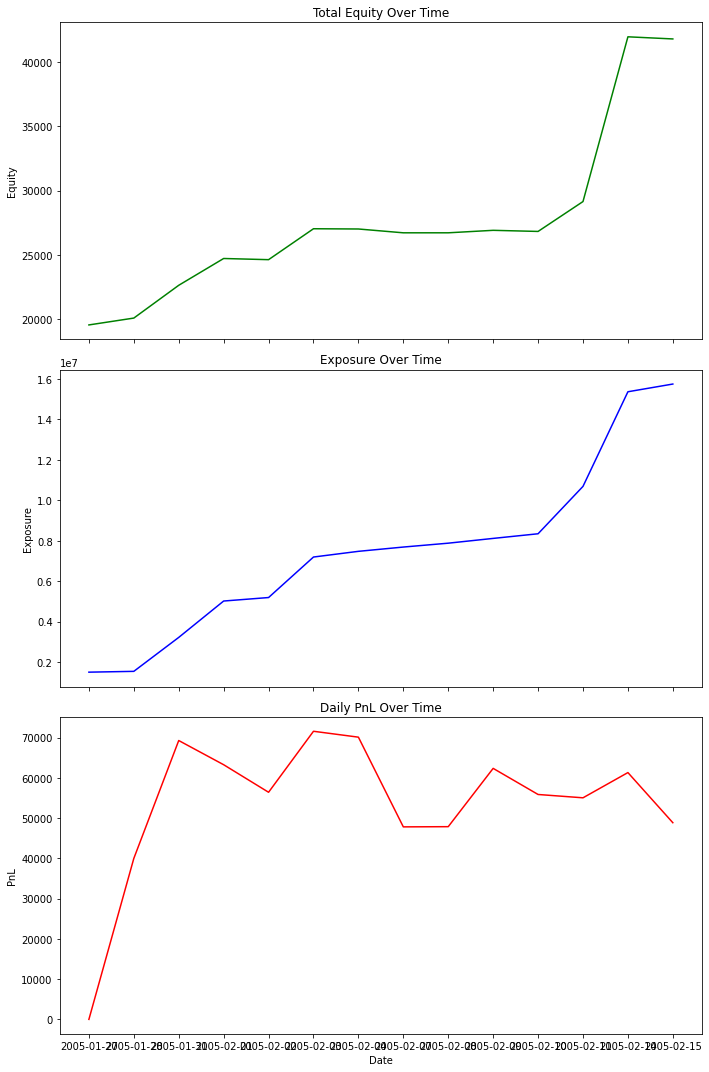

In [163]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plot 1: Total Equity Over Time
axs[0].plot(consolidated_metrics['Date'], consolidated_metrics['Equity'], color='green')
axs[0].set_title('Total Equity Over Time')
axs[0].set_ylabel('Equity')

# Plot 2: Exposure Over Time
axs[1].plot(consolidated_metrics['Date'], consolidated_metrics['Exposure'], color='blue')
axs[1].set_title('Exposure Over Time')
axs[1].set_ylabel('Exposure')

# Plot 3: Daily PnL Over Time
axs[2].plot(consolidated_metrics['Date'], consolidated_metrics['Daily PnL'], color='red')
axs[2].set_title('Daily PnL Over Time')
axs[2].set_ylabel('PnL')
axs[2].set_xlabel('Date')

plt.tight_layout()
plt.show()


In [165]:
import pandas as pd

# Assuming 'trade_df' is your DataFrame
trade_df['Date'] = pd.to_datetime(trade_df['Date'])
trade_df['Cumulative_PnL'] = trade_df.groupby('trade_id')['Daily PnL'].cumsum()


In [166]:
trade_df

,Date,open_date,Expiry_Date,Open_Price,Current_Price,trade_id,parent_id,initial_lots,active_lots,RF,HF,TSL,sum_hh_ll,is_crossover,Daily PnL,Rolling_PnL,Equity,Cumulative_PnL,Exposure
0,2005-01-27,2005-01-27,2005-04-28,1955.00,1955.00,1,NaN,10.0,10.0,4.95,0.00,1779.05,0,False,0.00,NaN,19550.00,0.00,1500000.00
1,2005-01-28,2005-01-27,2005-04-28,1955.00,2008.30,1,NaN,10.0,10.0,4.95,4.95,1827.55,1,False,39975.00,NaN,20083.00,39975.00,1539975.00
2,2005-01-31,2005-01-27,2005-04-28,1955.00,2057.60,1,NaN,10.0,9.0,4.95,10.24,1892.99,2,False,69255.00,NaN,18518.40,109230.00,1609230.00
3,2005-01-31,2005-01-31,2005-04-28,2057.60,2057.60,2,1.0,2.0,2.0,5.69,0.00,1872.42,0,False,0.00,NaN,4115.20,0.00,1609230.00
4,2005-02-01,2005-01-27,2005-04-28,1955.00,2059.85,1,NaN,10.0,8.0,4.95,15.54,1895.06,3,False,62910.00,34428.00,16478.80,172140.00,1672140.00
5,2005-02-01,2005-01-31,2005-04-28,2057.60,2059.85,2,1.0,2.0,2.0,5.69,5.95,1874.46,1,False,337.50,34495.50,4119.70,337.50,1672477.50
6,2005-02-01,2005-02-01,2005-04-28,2059.85,2059.85,3,1.0,2.0,2.0,5.76,0.00,1874.46,0,False,0.00,26500.50,4119.70,0.00,1672477.50
7,2005-02-02,2005-01-27,2005-04-28,1955.00,2052.25,1,NaN,10.0,8.0,4.95,15.72,1895.06,3,False,58350.00,24319.50,16418.00,230490.00,1730827.50
8,2005-02-02,2005-01-31,2005-04-28,2057.60,2052.25,2,1.0,2.0,2.0,5.69,12.05,1895.06,2,False,-802.50,24159.00,4104.50,-465.00,1730025.00
9,2005-02-02,2005-02-01,2005-04-28,2059.85,2052.25,3,1.0,2.0,2.0,5.76,6.10,1874.46,1,False,-1140.00,11349.00,4104.50,-1140.00,1728885.00


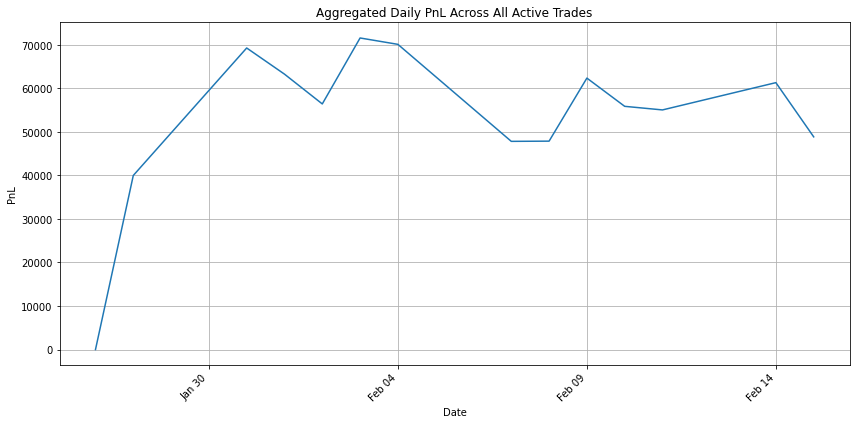

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates 

# Assuming `trade_df` is your DataFrame containing trade map with a 'Daily_PnL' column.

# Grouping by Date and summing the Daily_PnL for all trades active that day.
daily_total_pnl = trade_df.groupby('Date')['Daily PnL'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_total_pnl, x='Date', y='Daily PnL')

# Define the date format
date_format = mdates.DateFormatter('%b %d')

# Get the current axis
ax = plt.gca()

# Set major ticks format
ax.xaxis.set_major_formatter(date_format)

# Set major ticks locator: here you can set to locate every nth tick
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))  # set a major tick for every 5 days

# Rotate and right-align the labels for better readability
plt.xticks(rotation=45, ha='right')

plt.title('Aggregated Daily PnL Across All Active Trades')
plt.ylabel('PnL')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()  # adjusts subplot params to give specified padding


In [171]:
# Active lots

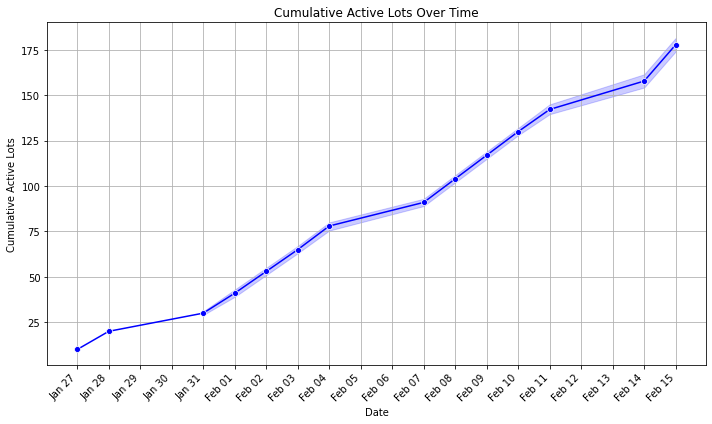

In [172]:
trade_df['cumulative_active_lots'] = trade_df['active_lots'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=trade_df, x='Date', y='cumulative_active_lots', marker='o', color='blue')

# Formatting Date on x-axis
date_format = mdates.DateFormatter('%b %d')
ax = plt.gca()
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45, ha='right')

plt.title('Cumulative Active Lots Over Time')
plt.ylabel('Cumulative Active Lots')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

In [173]:
trade_df

,Date,open_date,Expiry_Date,Open_Price,Current_Price,trade_id,parent_id,initial_lots,active_lots,RF,HF,TSL,sum_hh_ll,is_crossover,Daily PnL,Rolling_PnL,Equity,Cumulative_PnL,Exposure,cumulative_active_lots
0,2005-01-27,2005-01-27,2005-04-28,1955.00,1955.00,1,NaN,10.0,10.0,4.95,0.00,1779.05,0,False,0.00,NaN,19550.00,0.00,1500000.00,10.0
1,2005-01-28,2005-01-27,2005-04-28,1955.00,2008.30,1,NaN,10.0,10.0,4.95,4.95,1827.55,1,False,39975.00,NaN,20083.00,39975.00,1539975.00,20.0
2,2005-01-31,2005-01-27,2005-04-28,1955.00,2057.60,1,NaN,10.0,9.0,4.95,10.24,1892.99,2,False,69255.00,NaN,18518.40,109230.00,1609230.00,29.0
3,2005-01-31,2005-01-31,2005-04-28,2057.60,2057.60,2,1.0,2.0,2.0,5.69,0.00,1872.42,0,False,0.00,NaN,4115.20,0.00,1609230.00,31.0
4,2005-02-01,2005-01-27,2005-04-28,1955.00,2059.85,1,NaN,10.0,8.0,4.95,15.54,1895.06,3,False,62910.00,34428.00,16478.80,172140.00,1672140.00,39.0
5,2005-02-01,2005-01-31,2005-04-28,2057.60,2059.85,2,1.0,2.0,2.0,5.69,5.95,1874.46,1,False,337.50,34495.50,4119.70,337.50,1672477.50,41.0
6,2005-02-01,2005-02-01,2005-04-28,2059.85,2059.85,3,1.0,2.0,2.0,5.76,0.00,1874.46,0,False,0.00,26500.50,4119.70,0.00,1672477.50,43.0
7,2005-02-02,2005-01-27,2005-04-28,1955.00,2052.25,1,NaN,10.0,8.0,4.95,15.72,1895.06,3,False,58350.00,24319.50,16418.00,230490.00,1730827.50,51.0
8,2005-02-02,2005-01-31,2005-04-28,2057.60,2052.25,2,1.0,2.0,2.0,5.69,12.05,1895.06,2,False,-802.50,24159.00,4104.50,-465.00,1730025.00,53.0
9,2005-02-02,2005-02-01,2005-04-28,2059.85,2052.25,3,1.0,2.0,2.0,5.76,6.10,1874.46,1,False,-1140.00,11349.00,4104.50,-1140.00,1728885.00,55.0


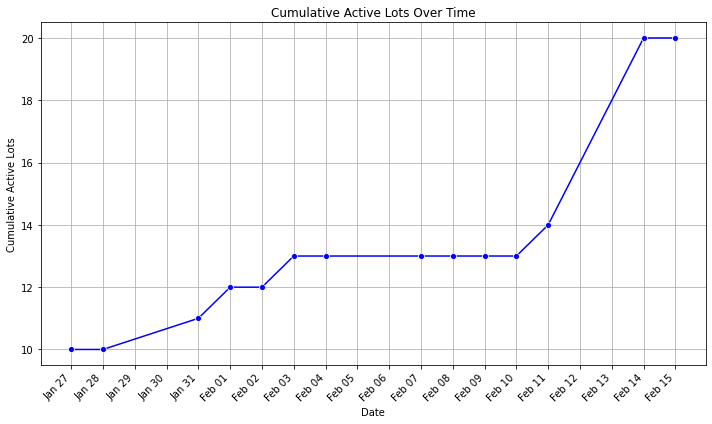

In [176]:

# Group by Date and summing the active lots for each day
daily_lots = trade_df.groupby('Date')['active_lots'].sum().reset_index()

# Calculating the cumulative sum of daily active lots
daily_lots['cumulative_active_lots'] = daily_lots['active_lots'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_lots, x='Date', y='active_lots', marker='o', color='blue')

# Formatting Date on x-axis
date_format = mdates.DateFormatter('%b %d')
ax = plt.gca()
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45, ha='right')

plt.title('Cumulative Active Lots Over Time')
plt.ylabel('Cumulative Active Lots')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
daily_sum = trade_df.groupby('Date')[['active_lots', 'equity', 'exposure']].sum().reset_index()

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

sns.lineplot(data=daily_sum, x='Date', y='active_lots', marker='o', color='blue', ax=ax[0])
ax[0].set_title('Daily Active Lots')
ax[0].set_ylabel('Active Lots')

sns.lineplot(data=daily_sum, x='Date', y='equity', marker='o', color='green', ax=ax[1])
ax[1].set_title('Daily Equity')
ax[1].set_ylabel('Equity')

sns.lineplot(data=daily_sum, x='Date', y='exposure', marker='o', color='red', ax=ax[2])
ax[2].set_title('Daily Exposure')
ax[2].set_ylabel('Exposure')

# Formatting Date on x-axis
date_format = mdates.DateFormatter('%b %d')
ax[2].xaxis.set_major_formatter(date_format)
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45, ha='right')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [ ]:
Exposure - 10 lots - open trade, how many lots you buy

In [ ]:
actual exposure + mmkt

In [179]:
import pandas as pd
from collections import deque
from math import floor

class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, active_lots, parent_id=None, hyper_parameter=5, is_crossover=False):
        self.open_date = open_date
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        self.days_from_signal_to_far_expiry = self.calculate_days_from_signal_to_far_expiry()
        
        self.open_price = sliced_df.loc[sliced_df['Date'] == self.open_date, 'Close'].iloc[0]
        self.active_lots = active_lots
        self.initial_lots = active_lots
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []
        self.hyper_parameter = hyper_parameter
        self.far_expiry = None
        self.is_crossover = is_crossover
        self.calculate_RF()
        
    def calculate_RF(self):
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        if self.far_expiry:
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
            self.RF = round((self.hyper_parameter * 90) / days_till_expiry,2)
        else:
            self.RF = None
            
    def calculate_days_from_signal_to_far_expiry(self):
        if self.far_expiry:
            return (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
        else:
            return None
            
    def process(self, df):
        
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        current_lowest_close = current_highest_close
        signal_day_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        
        tsl_crossed_signal_day_price = False
        
        highest_highs = 0
        lowest_lows = 0

        for _, row in df[df['Date'] >= self.open_date].iterrows():
            previous_highest_close = current_highest_close

            if row['Close'] > current_highest_close:
                highest_highs += 1
                current_highest_close = row['Close']
            elif row['Close'] < current_lowest_close:
                lowest_lows += 1
                current_lowest_close = row['Close']
#                 liquidated_lots = floor((HF / 100) * self.active_lots)
#                 self.active_lots -= liquidated_lots
#                 print(f"Liquidated {liquidated_lots} lots on {row['Date']} due to lowest low.")

            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(row['Date'])).days
            if days_till_expiry and self.days_from_signal_to_far_expiry:  # Avoid division by zero
                HF = round((self.RF * (highest_highs + lowest_lows) * self.days_from_signal_to_far_expiry) / days_till_expiry, 2) 
            else:
                HF = 0
            multiplier = 0.91 + 0.01 * (HF // 10)
            TSL = round(current_highest_close * multiplier,2)
            
            #spawning condition 1
            if row['Close'] > previous_highest_close:
                liquidated_lots = floor((HF / 100) * self.active_lots)
                if liquidated_lots >= 1:  # Checking that at least 1 lot is being liquidated
                    self.active_lots -= liquidated_lots
                    spawned_lots = liquidated_lots + 1
                    spawned_trade = Trade(row['Date'], spawned_lots, self.trade_id, self.hyper_parameter + 0.5)
                    trades_to_spawn.append(spawned_trade)
                    print(f"Spawned new trade with {spawned_lots} lots on {row['Date']}.")

                
            #spawning condition 2    
            is_crossover_spawn_today = False  # Track if a crossover spawn happens today
            if not tsl_crossed_signal_day_price and TSL > signal_day_close:
                crossover_spawned_lots = self.active_lots + 1
                spawned_trade = Trade(row['Date'], crossover_spawned_lots, self.trade_id, self.hyper_parameter + 0.5, True)
                trades_to_spawn.append(spawned_trade)
                print(f"Spawned a crossover trade with {crossover_spawned_lots} lots on {row['Date']}.")
                is_crossover_spawn_today = True  # Set to true if a crossover spawn happens today
                tsl_crossed_signal_day_price = True

            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'Expiry_Date': self.far_expiry,
                'Open_Price': self.open_price,
                'Current_Price': row['Close'],
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'initial_lots': self.initial_lots,
                'active_lots': self.active_lots,
                'RF': self.RF,
                'HF': HF,
                'TSL': TSL,
                'sum_hh_ll': highest_highs + lowest_lows,
                'is_crossover': is_crossover_spawn_today
                
            }
            
            self.data.append(daily_data)

            if row['Close'] < TSL:
                print(f"Terminating trade {self.trade_id} on {row['Date']} due to TSL.")
                break

        return self.data
           
# Initial setup
capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

data_path = "data.csv"
current_data = pd.read_csv("sliced.csv")

signal_idx = current_data[current_data['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * current_data.loc[signal_idx, 'Close'])
main_trade = Trade(current_data.loc[signal_idx, 'Date'], initial_lots)
trades_to_spawn = deque([main_trade])

all_trades = []
while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(current_data))

trade_df = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date','trade_id']).reset_index(drop=True)


print("Trades processed for today.")


Spawned new trade with 2 lots on 2005-01-31.
Spawned new trade with 2 lots on 2005-02-01.
Spawned new trade with 2 lots on 2005-02-03.
Spawned new trade with 3 lots on 2005-02-11.
Spawned new trade with 2 lots on 2005-02-14.
Spawned a crossover trade with 5.0 lots on 2005-02-14.
Trades processed for today.


In [180]:
trade_df

,Date,open_date,Expiry_Date,Open_Price,Current_Price,trade_id,parent_id,initial_lots,active_lots,RF,HF,TSL,sum_hh_ll,is_crossover
0,2005-01-27,2005-01-27,2005-04-28,1955.00,1955.00,1,NaN,10.0,10.0,4.95,0.00,1779.05,0,False
1,2005-01-28,2005-01-27,2005-04-28,1955.00,2008.30,1,NaN,10.0,10.0,4.95,5.00,1827.55,1,False
2,2005-01-31,2005-01-27,2005-04-28,1955.00,2057.60,1,NaN,10.0,9.0,4.95,10.36,1892.99,2,False
3,2005-01-31,2005-01-31,2005-04-28,2057.60,2057.60,2,1.0,2.0,2.0,5.69,0.00,1872.42,0,False
4,2005-02-01,2005-01-27,2005-04-28,1955.00,2059.85,1,NaN,10.0,8.0,4.95,15.71,1895.06,3,False
5,2005-02-01,2005-01-31,2005-04-28,2057.60,2059.85,2,1.0,2.0,2.0,5.69,5.76,1874.46,1,False
6,2005-02-01,2005-02-01,2005-04-28,2059.85,2059.85,3,1.0,2.0,2.0,5.76,0.00,1874.46,0,False
7,2005-02-02,2005-01-27,2005-04-28,1955.00,2052.25,1,NaN,10.0,8.0,4.95,15.90,1895.06,3,False
8,2005-02-02,2005-01-31,2005-04-28,2057.60,2052.25,2,1.0,2.0,2.0,5.69,11.65,1895.06,2,False
9,2005-02-02,2005-02-01,2005-04-28,2059.85,2052.25,3,1.0,2.0,2.0,5.76,5.83,1874.46,1,False


In [181]:
trade_df.to_csv("fix.csv",index=False)

In [182]:
hf_fix=trade_df.copy()

In [2]:
import pandas as pd

In [6]:
trade_df=pd.read_csv("final_final3.csv")

# PNL

In [8]:
# Calculating daily PnL: (Current Price - Open Price) * active lots
trade_df['Daily PnL'] = (trade_df['Current_Price'] - trade_df['Open_Price']) * trade_df['active_lots']*75


In [13]:

lot_size = 75  # replace with actual lot size

# Calculate Invested Amount per trade per day
trade_df['invested_amount'] = trade_df['active_lots'] * lot_size * trade_df['Current_Price']
#this exposure should not exceed 30 lakhs
# Aggregate to get daily exposure
daily_data = trade_df.groupby('Date')[['Daily PnL', 'invested_amount']].sum().reset_index()

# # Calculate Cumulative PnL and Equity as before
initial_capital = 10_00_000  # 10 Lakhs
# daily_data['cumulative_pnl'] = daily_data['open_pnl'].cumsum()
daily_data['equity'] = initial_capital + daily_data['Daily PnL']

# Exposure: Simply use the 'invested_amount' as it already considers all active trades
daily_data['exposure'] = daily_data['invested_amount']


# Equity and exposure

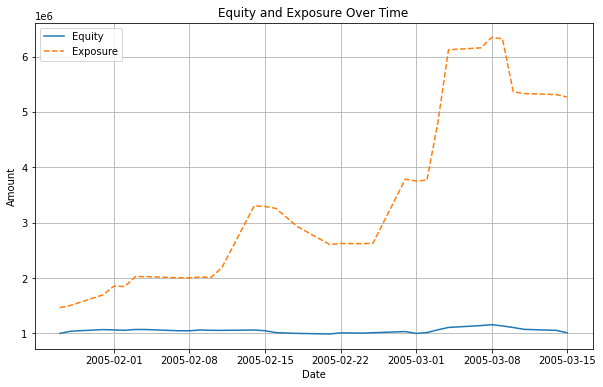

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(pd.to_datetime(daily_data['Date']), daily_data['equity'], label='Equity')
plt.plot(pd.to_datetime(daily_data['Date']), daily_data['exposure'], label='Exposure', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Equity and Exposure Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [185]:
trade_df

,Date,open_date,Expiry_Date,Open_Price,Current_Price,trade_id,parent_id,initial_lots,active_lots,RF,HF,TSL,sum_hh_ll,is_crossover,open_pnl
0,2005-01-27,2005-01-27,2005-04-28,1955.00,1955.00,1,NaN,10.0,10.0,4.95,0.00,1779.05,0,False,0.00
1,2005-01-28,2005-01-27,2005-04-28,1955.00,2008.30,1,NaN,10.0,10.0,4.95,5.00,1827.55,1,False,39975.00
2,2005-01-31,2005-01-27,2005-04-28,1955.00,2057.60,1,NaN,10.0,9.0,4.95,10.36,1892.99,2,False,69255.00
3,2005-01-31,2005-01-31,2005-04-28,2057.60,2057.60,2,1.0,2.0,2.0,5.69,0.00,1872.42,0,False,0.00
4,2005-02-01,2005-01-27,2005-04-28,1955.00,2059.85,1,NaN,10.0,8.0,4.95,15.71,1895.06,3,False,62910.00
5,2005-02-01,2005-01-31,2005-04-28,2057.60,2059.85,2,1.0,2.0,2.0,5.69,5.76,1874.46,1,False,337.50
6,2005-02-01,2005-02-01,2005-04-28,2059.85,2059.85,3,1.0,2.0,2.0,5.76,0.00,1874.46,0,False,0.00
7,2005-02-02,2005-01-27,2005-04-28,1955.00,2052.25,1,NaN,10.0,8.0,4.95,15.90,1895.06,3,False,58350.00
8,2005-02-02,2005-01-31,2005-04-28,2057.60,2052.25,2,1.0,2.0,2.0,5.69,11.65,1895.06,2,False,-802.50
9,2005-02-02,2005-02-01,2005-04-28,2059.85,2052.25,3,1.0,2.0,2.0,5.76,5.83,1874.46,1,False,-1140.00


In [15]:
daily_data

,Date,Daily PnL,invested_amount,equity,exposure
0,2005-01-27,0.00,1466250.00,1000000.00,1466250.00
1,2005-01-28,39975.00,1506225.00,1039975.00,1506225.00
2,2005-01-31,69255.00,1697520.00,1069255.00,1697520.00
3,2005-02-01,63247.50,1853865.00,1063247.50,1853865.00
4,2005-02-02,56407.50,1847025.00,1056407.50,1847025.00
5,2005-02-03,71553.75,2027463.75,1071553.75,2027463.75
6,2005-02-04,70091.25,2026001.25,1070091.25,2026001.25
7,2005-02-07,47812.50,2003722.50,1047812.50,2003722.50
8,2005-02-08,47861.25,2003771.25,1047861.25,2003771.25
9,2005-02-09,62340.00,2018250.00,1062340.00,2018250.00


In [ ]:
# virtual leverage, what all trades bought at what price and closed at what price and open trades and closed trades

# Visualising daily pnl and equity

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(pd.to_datetime(daily_data['Date']), daily_data['cumulative_pnl'], label='Cumulative PnL')
plt.plot(pd.to_datetime(daily_data['Date']), daily_data['equity'], label='Equity', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Equity and Cumulative PnL Over Time')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'cumulative_pnl'

<Figure size 720x432 with 0 Axes>

# working on new dataset from january till february last

In [194]:
df2=pd.read_csv("mo_hmo2.csv")

In [214]:
sliced_df = df2[(df['Date'] >= '2005-01-01') & (df2['Date'] <= '2005-03-15')]


In [215]:
sliced_df

,Date,PE_Ratio,SMA_5_Years,1.5sd_5SMA_POS,2sd_5SMA_POS,3sd_5SMA_POS,1.5sd_5SMA_NEG,2sd_5SMA_NEG,3sd_5SMA_NEG,PE_Ratio_7.5,...,3sd_10_SMA_NEG,signals,expiry_window,near_expiry,next_expiry,far_expiry,EMA_Actual Momentum,Zone,Open,Close
1251,2005-01-03,15.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.57,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,2080.00,2115.00
1252,2005-01-04,15.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.49,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,2116.95,2103.75
1253,2005-01-05,14.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.96,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,2103.75,2032.20
1254,2005-01-06,14.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.71,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,2031.55,1998.35
1255,2005-01-07,14.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.84,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,1998.25,2015.50
1256,2005-01-10,14.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.58,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,2016.75,1982.00
1257,2005-01-11,14.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.37,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,1982.70,1952.05
1258,2005-01-12,14.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.05,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,1953.60,1913.60
1259,2005-01-13,14.35,17.054444,22.559299,24.394251,28.064154,11.549590,9.714638,6.044735,14.35,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,1922.50,1954.55
1260,2005-01-14,14.18,17.045135,22.538572,24.369717,28.032008,11.551698,9.720553,6.058261,14.18,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,1954.90,1931.10


In [216]:
sliced_df["signals"]

1251      0
1252      0
1253      0
1254      0
1255      0
1256      0
1257      0
1258      0
1259      0
1260      0
1261      0
1262      0
1263      0
1264      0
1265      0
1266      0
1267    HMO
1268      0
1269      0
1270      0
1271      0
1272      0
1273      0
1274      0
1275      0
1276      0
1277      0
1278      0
1279      0
1280      0
1281      0
1282      0
1283      0
1284      0
1285      0
1286      0
1287      0
1288      0
1289      0
1290      0
1291      0
1292      0
1293      0
1294      0
1295      0
1296      0
1297      0
1298      0
1299      0
1300      0
Name: signals, dtype: object

In [217]:
sliced_df.to_csv("sliced_new.csv",index=False)

In [218]:
import pandas as pd
from collections import deque
from math import floor

class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, active_lots, parent_id=None, hyper_parameter=5, is_crossover=False):
        self.open_date = open_date
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        self.days_from_signal_to_far_expiry = self.calculate_days_from_signal_to_far_expiry()
        
        self.open_price = sliced_df.loc[sliced_df['Date'] == self.open_date, 'Close'].iloc[0]
        self.active_lots = active_lots
        self.initial_lots = active_lots
        self.status = 'Open'
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []
        self.hyper_parameter = hyper_parameter
        self.far_expiry = None
        self.is_crossover = is_crossover
        self.calculate_RF()
        
    def calculate_RF(self):
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        if self.far_expiry:
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
            self.RF = round((self.hyper_parameter * 90) / days_till_expiry,2)
        else:
            self.RF = None
            
    def calculate_days_from_signal_to_far_expiry(self):
        if self.far_expiry:
            return (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
        else:
            return None
            
    def process(self, df):
        
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        current_lowest_close = current_highest_close
        signal_day_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        
        tsl_crossed_signal_day_price = False
        
        highest_highs = 0
        lowest_lows = 0

        for _, row in df[df['Date'] >= self.open_date].iterrows():
            previous_highest_close = current_highest_close

            if row['Close'] > current_highest_close:
                highest_highs += 1
                current_highest_close = row['Close']
            elif row['Close'] < current_lowest_close:
                lowest_lows += 1
                current_lowest_close = row['Close']
#                 liquidated_lots = floor((HF / 100) * self.active_lots)
#                 self.active_lots -= liquidated_lots
#                 print(f"Liquidated {liquidated_lots} lots on {row['Date']} due to lowest low.")

            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(row['Date'])).days
            if days_till_expiry and self.days_from_signal_to_far_expiry:  # Avoid division by zero
                HF = round((self.RF * (highest_highs + lowest_lows) * self.days_from_signal_to_far_expiry) / days_till_expiry, 2) 
            else:
                HF = 0
            multiplier = 0.91 + 0.01 * (HF // 10)
            TSL = round(current_highest_close * multiplier,2)
            
            #spawning condition 1
            if row['Close'] > previous_highest_close:
                liquidated_lots = floor((HF / 100) * self.active_lots)
                if liquidated_lots >= 1:  # Checking that at least 1 lot is being liquidated
                    self.active_lots -= liquidated_lots
                    spawned_lots = liquidated_lots + 1
                    spawned_trade = Trade(row['Date'], spawned_lots, self.trade_id, self.hyper_parameter + 0.5)
                    trades_to_spawn.append(spawned_trade)
                    print(f"Spawned new trade with {spawned_lots} lots on {row['Date']}.")

                
            #spawning condition 2    
            is_crossover_spawn_today = False  # Track if a crossover spawn happens today
            if not tsl_crossed_signal_day_price and TSL > signal_day_close:
                crossover_spawned_lots = self.active_lots + 1
                spawned_trade = Trade(row['Date'], crossover_spawned_lots, self.trade_id, self.hyper_parameter + 0.5, True)
                trades_to_spawn.append(spawned_trade)
                print(f"Spawned a crossover trade with {crossover_spawned_lots} lots on {row['Date']}.")
                is_crossover_spawn_today = True  # Set to true if a crossover spawn happens today
                tsl_crossed_signal_day_price = True

            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'Expiry_Date': self.far_expiry,
                'Open_Price': self.open_price,
                'Current_Price': row['Close'],
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'initial_lots': self.initial_lots,
                'active_lots': self.active_lots,
                'status': self.status,
                'RF': self.RF,
                'HF': HF,
                'TSL': TSL,
                'sum_hh_ll': highest_highs + lowest_lows,
                'is_crossover': is_crossover_spawn_today
                
            }
            
            

            if row['Close'] < TSL:
                print(f"Terminating trade {self.trade_id} on {row['Date']} due to TSL.")
                self.status = 'Closed'  # Update status to Closed when terminating the trade
                daily_data['status'] = self.status  # Also update the status in daily_data
                self.data.append(daily_data)  # Ensure to append the final data point for the closed trade
                break

            self.data.append(daily_data)

        return self.data
           
# Initial setup
capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

data_path = "data.csv"
current_data = pd.read_csv("sliced_new.csv")

signal_idx = current_data[current_data['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * current_data.loc[signal_idx, 'Close'])
main_trade = Trade(current_data.loc[signal_idx, 'Date'], initial_lots)
trades_to_spawn = deque([main_trade])

all_trades = []
while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(current_data))

trade_df = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date','trade_id']).reset_index(drop=True)


print("Trades processed for today.")


Spawned new trade with 2 lots on 2005-01-31.
Spawned new trade with 2 lots on 2005-02-01.
Spawned new trade with 2 lots on 2005-02-03.
Spawned new trade with 3 lots on 2005-02-11.
Spawned new trade with 2 lots on 2005-02-14.
Spawned a crossover trade with 5.0 lots on 2005-02-14.
Spawned new trade with 3 lots on 2005-02-28.
Spawned new trade with 2 lots on 2005-03-03.
Terminating trade 1 on 2005-03-09 due to TSL.
Spawned new trade with 2 lots on 2005-02-28.
Spawned a crossover trade with 2 lots on 2005-03-03.
Spawned new trade with 2 lots on 2005-03-08.
Terminating trade 2 on 2005-03-08 due to TSL.
Spawned new trade with 2 lots on 2005-02-28.
Spawned a crossover trade with 2 lots on 2005-03-03.
Terminating trade 3 on 2005-03-09 due to TSL.
Spawned new trade with 2 lots on 2005-02-28.
Spawned a crossover trade with 2 lots on 2005-03-04.
Terminating trade 4 on 2005-03-09 due to TSL.
Spawned new trade with 2 lots on 2005-02-28.
Spawned new trade with 2 lots on 2005-03-03.
Spawned a crossov

In [219]:
trade_df

,Date,open_date,Expiry_Date,Open_Price,Current_Price,trade_id,parent_id,initial_lots,active_lots,status,RF,HF,TSL,sum_hh_ll,is_crossover
0,2005-01-27,2005-01-27,2005-04-28,1955.00,1955.00,1,NaN,10.0,10.0,Open,4.95,0.00,1779.05,0,False
1,2005-01-28,2005-01-27,2005-04-28,1955.00,2008.30,1,NaN,10.0,10.0,Open,4.95,5.00,1827.55,1,False
2,2005-01-31,2005-01-27,2005-04-28,1955.00,2057.60,1,NaN,10.0,9.0,Open,4.95,10.36,1892.99,2,False
3,2005-01-31,2005-01-31,2005-04-28,2057.60,2057.60,2,1.0,2.0,2.0,Open,5.69,0.00,1872.42,0,False
4,2005-02-01,2005-01-27,2005-04-28,1955.00,2059.85,1,NaN,10.0,8.0,Open,4.95,15.71,1895.06,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2005-03-15,2005-02-28,2005-05-26,2103.25,2128.95,22,7.0,3.0,2.0,Open,6.21,37.52,2038.81,5,False
341,2005-03-15,2005-03-03,2005-05-26,2128.85,2128.95,23,7.0,2.0,2.0,Open,6.43,22.50,2017.12,3,False
342,2005-03-15,2005-03-04,2005-05-26,2148.15,2128.95,24,7.0,2.0,2.0,Open,6.51,30.02,2038.81,4,False
343,2005-03-15,2005-03-04,2005-05-26,2148.15,2128.95,25,7.0,2.0,2.0,Open,6.51,30.02,2038.81,4,False


In [220]:
trade_df.to_csv("till_march.csv",index=False)

In [221]:
current_data

,Date,PE_Ratio,SMA_5_Years,1.5sd_5SMA_POS,2sd_5SMA_POS,3sd_5SMA_POS,1.5sd_5SMA_NEG,2sd_5SMA_NEG,3sd_5SMA_NEG,PE_Ratio_7.5,...,3sd_10_SMA_NEG,signals,expiry_window,near_expiry,next_expiry,far_expiry,EMA_Actual Momentum,Zone,Open,Close
0,2005-01-03,15.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.57,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,2080.00,2115.00
1,2005-01-04,15.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.49,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,2116.95,2103.75
2,2005-01-05,14.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.96,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,2103.75,2032.20
3,2005-01-06,14.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.71,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,2031.55,1998.35
4,2005-01-07,14.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.84,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,1998.25,2015.50
5,2005-01-10,14.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.58,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,2016.75,1982.00
6,2005-01-11,14.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.37,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,1982.70,1952.05
7,2005-01-12,14.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.05,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,1953.60,1913.60
8,2005-01-13,14.35,17.054444,22.559299,24.394251,28.064154,11.549590,9.714638,6.044735,14.35,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,1922.50,1954.55
9,2005-01-14,14.18,17.045135,22.538572,24.369717,28.032008,11.551698,9.720553,6.058261,14.18,...,NaN,0,2004-12-30 - 2005-01-26,2005-01-27,2005-02-24,2005-03-31,1.0,0,1954.90,1931.10


In [223]:
import pandas as pd
from collections import deque
from math import floor

class Trade:
    trade_id_counter = 1

    def __init__(self, open_date, active_lots, parent_id=None, hyper_parameter=5, is_crossover=False):
        self.open_date = open_date
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        self.days_from_signal_to_far_expiry = self.calculate_days_from_signal_to_far_expiry()
        
        self.open_price = sliced_df.loc[sliced_df['Date'] == self.open_date, 'Close'].iloc[0]
        self.active_lots = active_lots
        self.initial_lots = active_lots
        self.status = 'Open'
        self.trade_id = Trade.trade_id_counter
        Trade.trade_id_counter += 1
        self.parent_id = parent_id
        self.data = []
        self.hyper_parameter = hyper_parameter
        self.far_expiry = None
        self.is_crossover = is_crossover
        self.calculate_RF()
        
    def calculate_RF(self):
        self.far_expiry = sliced_df.loc[sliced_df['Date'] == self.open_date, 'far_expiry'].iloc[0]
        if self.far_expiry:
            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
            self.RF = round((self.hyper_parameter * 90) / days_till_expiry,2)
        else:
            self.RF = None
            
    def calculate_days_from_signal_to_far_expiry(self):
        if self.far_expiry:
            return (pd.to_datetime(self.far_expiry) - pd.to_datetime(self.open_date)).days
        else:
            return None
            
    def process(self, df):
        
        current_highest_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        current_lowest_close = current_highest_close
        signal_day_close = df.loc[df['Date'] == self.open_date, 'Close'].iloc[0]
        
        tsl_crossed_signal_day_price = False
        
        highest_highs = 0
        lowest_lows = 0

        for _, row in df[df['Date'] >= self.open_date].iterrows():
            previous_highest_close = current_highest_close

            if row['Close'] > current_highest_close:
                highest_highs += 1
                current_highest_close = row['Close']
            elif row['Close'] < current_lowest_close:
                lowest_lows += 1
                current_lowest_close = row['Close']
#                 liquidated_lots = floor((HF / 100) * self.active_lots)
#                 self.active_lots -= liquidated_lots
#                 print(f"Liquidated {liquidated_lots} lots on {row['Date']} due to lowest low.")

            days_till_expiry = (pd.to_datetime(self.far_expiry) - pd.to_datetime(row['Date'])).days
            if days_till_expiry and self.days_from_signal_to_far_expiry:  # Avoid division by zero
                HF = round((self.RF * (highest_highs + lowest_lows) * self.days_from_signal_to_far_expiry) / days_till_expiry, 2) 
            else:
                HF = 0
            multiplier = 0.91 + 0.01 * (HF // 10)
            TSL = round(current_highest_close * multiplier,2)
            
            #spawning condition 1
            liquidated_lots = floor((HF / 100) * self.active_lots)
            if row['Close'] > previous_highest_close and liquidated_lots >= 1:
                self.active_lots -= liquidated_lots
                spawned_lots = liquidated_lots + 1
                spawned_trade = Trade(row['Date'], spawned_lots, self.trade_id, self.hyper_parameter + 0.5)
                trades_to_spawn.append(spawned_trade)
                print(f"Spawned new trade with {spawned_lots} lots on {row['Date']}.")
                Trade.trade_id_counter += 1
                self.hyper_parameter += 0.5  # Increment hyperparameter

                
            #spawning condition 2    
            is_crossover_spawn_today = False
            if not tsl_crossed_signal_day_price and TSL > signal_day_close:
                crossover_spawned_lots = self.active_lots + 1
                spawned_trade = Trade(row['Date'], crossover_spawned_lots, self.trade_id, self.hyper_parameter + 0.5, True)
                trades_to_spawn.append(spawned_trade)
                print(f"Spawned a crossover trade with {crossover_spawned_lots} lots on {row['Date']}.")
                is_crossover_spawn_today = True
                tsl_crossed_signal_day_price = True
                Trade.trade_id_counter += 1
                self.hyper_parameter += 0.5  # Increment hyperparameter

            daily_data = {
                'Date': row['Date'],
                'open_date': self.open_date,
                'Expiry_Date': self.far_expiry,
                'Open_Price': self.open_price,
                'Current_Price': row['Close'],
                'trade_id': self.trade_id,
                'parent_id': self.parent_id,
                'initial_lots': self.initial_lots,
                'active_lots': self.active_lots,
                'status': self.status,
                'RF': self.RF,
                'HF': HF,
                'TSL': TSL,
                'sum_hh_ll': highest_highs + lowest_lows,
                'is_crossover': is_crossover_spawn_today
                
            }
            
            

            if row['Close'] < TSL:
                print(f"Terminating trade {self.trade_id} on {row['Date']} due to TSL.")
                self.status = 'Closed'  # Update status to Closed when terminating the trade
                daily_data['status'] = self.status  # Also update the status in daily_data
                self.data.append(daily_data)  # Ensure to append the final data point for the closed trade
                break

            self.data.append(daily_data)

        return self.data
           
# Initial setup
capital = 10_00_000  # 10 Lakhs
max_exposure = 1.5  # 1.5x Exposure

data_path = "data.csv"
current_data = pd.read_csv("sliced_new.csv")

signal_idx = current_data[current_data['signals'] == 'HMO'].index[0]
initial_lots = (capital * max_exposure) // (75 * current_data.loc[signal_idx, 'Close'])
main_trade = Trade(current_data.loc[signal_idx, 'Date'], initial_lots)
trades_to_spawn = deque([main_trade])

all_trades = []
while trades_to_spawn:
    current_trade = trades_to_spawn.popleft()
    all_trades.extend(current_trade.process(current_data))

trade_df = pd.DataFrame(all_trades)
trade_df = trade_df.sort_values(by=['Date','trade_id']).reset_index(drop=True)


print("Trades processed for today.")


Spawned new trade with 2 lots on 2005-01-31.
Spawned new trade with 2 lots on 2005-02-01.
Spawned new trade with 2 lots on 2005-02-03.
Spawned new trade with 3 lots on 2005-02-11.
Spawned new trade with 2 lots on 2005-02-14.
Spawned a crossover trade with 5.0 lots on 2005-02-14.
Spawned new trade with 3 lots on 2005-02-28.
Spawned new trade with 2 lots on 2005-03-03.
Terminating trade 1 on 2005-03-09 due to TSL.
Spawned new trade with 2 lots on 2005-02-28.
Spawned a crossover trade with 2 lots on 2005-03-03.
Spawned new trade with 2 lots on 2005-03-08.
Terminating trade 2 on 2005-03-08 due to TSL.
Spawned new trade with 2 lots on 2005-02-28.
Spawned a crossover trade with 2 lots on 2005-03-03.
Spawned new trade with 2 lots on 2005-03-08.
Terminating trade 4 on 2005-03-08 due to TSL.
Spawned new trade with 2 lots on 2005-02-28.
Spawned a crossover trade with 2 lots on 2005-03-03.
Spawned new trade with 2 lots on 2005-03-07.
Terminating trade 6 on 2005-03-07 due to TSL.
Spawned new trade

In [224]:
trade_df

,Date,open_date,Expiry_Date,Open_Price,Current_Price,trade_id,parent_id,initial_lots,active_lots,status,RF,HF,TSL,sum_hh_ll,is_crossover
0,2005-01-27,2005-01-27,2005-04-28,1955.00,1955.00,1,NaN,10.0,10.0,Open,4.95,0.00,1779.05,0,False
1,2005-01-28,2005-01-27,2005-04-28,1955.00,2008.30,1,NaN,10.0,10.0,Open,4.95,5.00,1827.55,1,False
2,2005-01-31,2005-01-27,2005-04-28,1955.00,2057.60,1,NaN,10.0,9.0,Open,4.95,10.36,1892.99,2,False
3,2005-01-31,2005-01-31,2005-04-28,2057.60,2057.60,2,1.0,2.0,2.0,Open,5.69,0.00,1872.42,0,False
4,2005-02-01,2005-01-27,2005-04-28,1955.00,2059.85,1,NaN,10.0,8.0,Open,4.95,15.71,1895.06,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,2005-03-15,2005-03-03,2005-05-26,2128.85,2128.95,54,12.0,2.0,2.0,Open,10.18,35.63,2038.81,3,False
378,2005-03-15,2005-03-04,2005-05-26,2148.15,2128.95,56,12.0,2.0,2.0,Open,10.84,49.98,2060.50,4,False
379,2005-03-15,2005-03-07,2005-05-26,2160.10,2128.95,58,14.0,2.0,2.0,Open,10.12,44.98,2060.50,4,False
380,2005-03-15,2005-03-04,2005-05-26,2148.15,2128.95,60,50.0,2.0,2.0,Open,9.76,45.00,2060.50,4,False
